# Goal: convert DGParentedTree to RS3 file

In [1]:
import os
from tempfile import NamedTemporaryFile

from lxml import etree
from lxml.builder import E

import discoursegraphs as dg
from discoursegraphs.readwrite.rst.rs3 import extract_relationtypes, RSTTree
from discoursegraphs.readwrite.rst.rs3.rs3tree import (
    is_leaf, NUCLEARITY_LABELS)
from discoursegraphs.readwrite.rst.rs3.rs3filewriter import RS3FileWriter
from discoursegraphs.readwrite.tree import DGParentedTree, t

In [2]:
RS3TREE_DIR = os.path.join(dg.DATA_ROOT_DIR, 'rs3tree')
PCC_RS3_DIR = os.path.join(dg.DATA_ROOT_DIR,
                           'potsdam-commentary-corpus-2.0.0', 'rst')

def example2tree(rs3tree_example_filename, rs3tree_dir=RS3TREE_DIR,
                 word_wrap=0, debug=False):
    """Given the filename of an rs3 file and its directory,
    return an RSTTree instance of it."""
    filepath = os.path.join(rs3tree_dir, rs3tree_example_filename)
    return RSTTree(filepath, word_wrap=word_wrap, debug=debug)

def rs3view(rs3tree_example_filename, rs3tree_dir=RS3TREE_DIR):
    filepath = os.path.join(rs3tree_dir, rs3tree_example_filename)
    return rstviewer.embed_rs3_image(filepath)

def cat(filename, filedir_path=RS3TREE_DIR):
    """Print the content of the given file."""
    filepath = os.path.join(filedir_path, filename)
    with open(filepath) as textfile:
        print(textfile.read())

# example files to use:

In [3]:
os.listdir(RS3TREE_DIR)

['eins-zwei-drei-(joint-eins-and-zwei-and-drei).rs3',
 'n-s-s-schema-eins-zwei-(joint-drei-vier)-plus-top-span.rs3',
 'only-one-segment.rs3',
 'eins-zwei-drei-(circ-(circ-eins-to-zwei)-from-drei).rs3',
 'foo-bar-only-segments.rs3',
 'foo-bar-circ-foo-to-bar.rs3',
 'foo-bar-circ-foo-to-bar-plus-top-span.rs3',
 'eins-zwei-drei-(circ-(joint-eins-and-zwei)-to-drei).rs3',
 'eins-zwei-drei-(elab-eins-from-(joint-zwei-and-drei).rs3',
 'maz-10207-excerpt.rs3',
 'maz-14654-excerpt.rs3',
 'schema-elab-elab.rs3',
 'maz-14813-excerpt.rs3',
 'foo-bar-foo-conj-bar.rs3',
 'maz-11279-excerpt.rs3',
 'eins-zwei-drei-(circ-eins-from-(joint-zwei-and-drei).rs3',
 'eins-zwei-drei-only-segments.rs3',
 'maz-10575-excerpt-expected-new-ids.rs3',
 'maz-6918-excerpt.rs3',
 'foo-bar-foo-joint-bar-plus-top-span.rs3',
 'maz-10575-excerpt-reconverted-expected.rs3',
 '.empty.rs3.swp',
 'eins-zwei-drei-(circ-(circ-eins-to-zwei)-to-drei.rs3',
 'n-s-s-schema-eins-zwei-(joint-drei-vier).rs3',
 'eins-zwei-drei-(circ-(joint

# Task 1: create an empty rs3 file

In [4]:
def etree2file(rst_etree):
    """Converts etree element into a temporary file, returns the file name."""
    out_str = etree.tostring(rst_etree, pretty_print=True, encoding="UTF-8")
    temp_file = NamedTemporaryFile(delete=False)
    with open(temp_file.name, 'w') as outfile:
        outfile.write(out_str)
    return temp_file.name

In [5]:
dgtree = example2tree('empty.rs3')
dgtree

In [6]:
cat('empty.rs3')

<rst>
  <header>
    <relations>
    </relations>
  </header>
  <body>
  </body>
</rst>



In [7]:
RS3FileWriter(dgtree)

<rst>
  <header>
    <relations/>
  </header>
  <body/>
</rst>



In [8]:
RS3FileWriter(example2tree('empty.rs3'), debug=False).etree

<Element rst at 0x7ff3bf5038c0>

In [9]:
example2tree(etree2file(RS3FileWriter(example2tree('empty.rs3'), debug=False).etree))

# Task 2: create rs3 file with one segment

In [10]:
dgtree = example2tree('only-one-segment.rs3')
dgtree

In [11]:
RS3FileWriter(dgtree)

<rst>
  <header>
    <relations/>
  </header>
  <body>
    <segment id="2">foo</segment>
  </body>
</rst>



In [12]:
example2tree(etree2file(RS3FileWriter(dgtree, debug=False).etree))

In [13]:
cat('only-one-segment.rs3')

<rst>
  <header>
    <relations>
    </relations>
  </header>
  <body>
    <segment id="1">foo</segment>
  </body>
</rst>



# Task 3: create rs3 file with one relation

## reltype rst

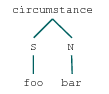

In [14]:
example2tree("foo-bar-circ-foo-to-bar.rs3")

In [15]:
tree = example2tree("foo-bar-circ-foo-to-bar.rs3").tree

def cousins_treepos(treepos):
    cousins_pos = []
    mother_pos = parent_treepos(treepos)
    grandma_pos = parent_treepos(mother_pos)
    if grandma_pos is not None:
        grandmas_children_pos = children_treepos(grandma_pos)
        for grandmas_child_pos in grandmas_children_pos:
            if grandmas_child_pos != mother_pos:
                cousins_pos.extend(children_treepos(grandmas_child_pos))
    return cousins_pos

<rst>
  <header>
    <relations>
      <rel name="circumstance" type="rst"/>
    </relations>
  </header>
  <body>
    <segment id="3" parent="5" relname="circumstance">foo</segment>
    <segment id="5" parent="1" relname="span">bar</segment>
    <group id="1" type="span"/>
  </body>
</rst>



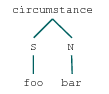

In [16]:
example2tree(etree2file(RS3FileWriter(example2tree("foo-bar-circ-foo-to-bar.rs3")).etree))

In [17]:
cat("foo-bar-circ-foo-to-bar.rs3")

<rst>
  <header>
    <relations>
      <rel name="circumstance" type="rst" />
    </relations>
  </header>
  <body>
    <segment id="1" parent="2" relname="circumstance">foo</segment>
    <segment id="2"> bar</segment>
  </body>
</rst>



## reltype multinuc

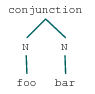

In [18]:
example2tree('foo-bar-foo-conj-bar.rs3')

In [19]:
cat('foo-bar-foo-conj-bar.rs3')

<rst>
  <header>
    <relations>
      <rel name="conjunction" type="multinuc" />
    </relations>
  </header>
  <body>
    <segment id="1" parent="3" relname="conjunction">foo</segment>
    <segment id="2" parent="3" relname="conjunction"> bar</segment>
    <group id="3" type="multinuc" />
  </body>
</rst>



<rst>
  <header>
    <relations>
      <rel name="conjunction" type="multinuc"/>
    </relations>
  </header>
  <body>
    <segment id="3" parent="1" relname="conjunction">foo</segment>
    <segment id="5" parent="1" relname="conjunction">bar</segment>
    <group id="1" type="multinuc"/>
  </body>
</rst>



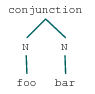

In [20]:
example2tree(etree2file(RS3FileWriter(example2tree('foo-bar-foo-conj-bar.rs3')).etree))

# Task 4: create rs3 file w/ nested tree

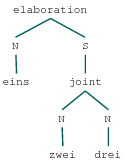

In [21]:
dgtree = example2tree('eins-zwei-drei-(elab-eins-from-(joint-zwei-and-drei).rs3')
dgtree

In [22]:
cat('eins-zwei-drei-(elab-eins-from-(joint-zwei-and-drei).rs3')

<rst>
  <header>
    <relations>
      <rel name="elaboration" type="rst" />
      <rel name="joint" type="multinuc" />
    </relations>
  </header>
  <body>
    <segment id="1">eins</segment>
    <segment id="2" parent="4" relname="joint"> zwei</segment>
    <segment id="3" parent="4" relname="joint"> drei</segment>
    <group id="4" type="multinuc" parent="1" relname="elaboration" />
  </body>
</rst>



<rst>
  <header>
    <relations>
      <rel name="elaboration" type="rst"/>
      <rel name="joint" type="multinuc"/>
    </relations>
  </header>
  <body>
    <segment id="3" parent="1" relname="span">eins</segment>
    <segment id="7" parent="5" relname="joint">zwei</segment>
    <segment id="9" parent="5" relname="joint">drei</segment>
    <group id="1" type="span"/>
    <group id="5" type="multinuc" parent="3" relname="elaboration"/>
  </body>
</rst>



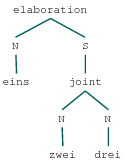

In [23]:
example2tree(etree2file(RS3FileWriter(dgtree).etree))

# Task 5: convert more complex trees

In [24]:
# for fname in os.listdir(RS3TREE_DIR):
#     if fname.startswith('maz'): print fname

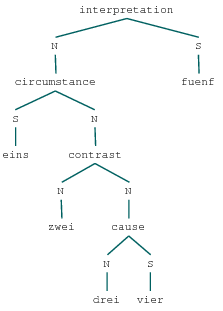

In [25]:
# example2tree('maz-6918-excerpt.rs3') # 12
example2tree('maz-10575-excerpt.rs3') # 5
# example2tree('maz-4472-excerpt.rs3') # 13
# example2tree('maz-12666-excerpt.rs3') # 22
# example2tree('maz-00001-excerpt.rs3') # 22
# example2tree('maz-3367-excerpt.rs3') # 23

In [26]:
input_tree = t('interpretation', [
    ('N', [
        ('circumstance', [
            ('S', ['eins']),
            ('N', [
                ('contrast', [
                    ('N', ['zwei']),
                    ('N', [
                        ('cause', [
                            ('N', ['drei']),
                            ('S', ['vier'])])])])])])]),
    ('S', ['fuenf'])])

In [27]:
dgtree = example2tree('maz-10575-excerpt.rs3')

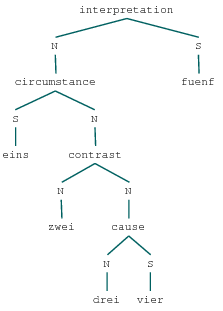

In [28]:
dgtree

In [29]:
dgtree.tree == input_tree

True

<rst>
  <header>
    <relations>
      <rel name="cause" type="rst"/>
      <rel name="circumstance" type="rst"/>
      <rel name="contrast" type="multinuc"/>
      <rel name="interpretation" type="rst"/>
    </relations>
  </header>
  <body>
    <segment id="5" parent="7" relname="circumstance">eins</segment>
    <segment id="9" parent="7" relname="contrast">zwei</segment>
    <segment id="13" parent="11" relname="span">drei</segment>
    <segment id="15" parent="13" relname="cause">vier</segment>
    <segment id="17" parent="3" relname="interpretation">fuenf</segment>
    <group id="1" type="span"/>
    <group id="3" type="span" parent="1" relname="span"/>
    <group id="7" type="multinuc" parent="3" relname="span"/>
    <group id="11" type="span" parent="7" relname="contrast"/>
  </body>
</rst>



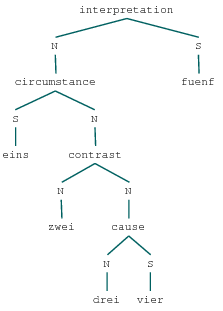

In [30]:
# FIXME: should have 5 EDUs

empty_tree = example2tree(etree2file(RS3FileWriter(dgtree).etree))
empty_tree

In [31]:
# FIXME: should have 5 EDUs; has no root group
RS3FileWriter(dgtree)

<rst>
  <header>
    <relations>
      <rel name="cause" type="rst"/>
      <rel name="circumstance" type="rst"/>
      <rel name="contrast" type="multinuc"/>
      <rel name="interpretation" type="rst"/>
    </relations>
  </header>
  <body>
    <segment id="5" parent="7" relname="circumstance">eins</segment>
    <segment id="9" parent="7" relname="contrast">zwei</segment>
    <segment id="13" parent="11" relname="span">drei</segment>
    <segment id="15" parent="13" relname="cause">vier</segment>
    <segment id="17" parent="3" relname="interpretation">fuenf</segment>
    <group id="1" type="span"/>
    <group id="3" type="span" parent="1" relname="span"/>
    <group id="7" type="multinuc" parent="3" relname="span"/>
    <group id="11" type="span" parent="7" relname="contrast"/>
  </body>
</rst>



In [32]:
etree2file(RS3FileWriter(dgtree).etree)

<rst>
  <header>
    <relations>
      <rel name="cause" type="rst"/>
      <rel name="circumstance" type="rst"/>
      <rel name="contrast" type="multinuc"/>
      <rel name="interpretation" type="rst"/>
    </relations>
  </header>
  <body>
    <segment id="5" parent="7" relname="circumstance">eins</segment>
    <segment id="9" parent="7" relname="contrast">zwei</segment>
    <segment id="13" parent="11" relname="span">drei</segment>
    <segment id="15" parent="13" relname="cause">vier</segment>
    <segment id="17" parent="3" relname="interpretation">fuenf</segment>
    <group id="1" type="span"/>
    <group id="3" type="span" parent="1" relname="span"/>
    <group id="7" type="multinuc" parent="3" relname="span"/>
    <group id="11" type="span" parent="7" relname="contrast"/>
  </body>
</rst>



'/tmp/tmpXivbCM'

In [33]:
r = RS3FileWriter(dgtree, debug=False)
r.dgtree.leaves()

['eins', 'zwei', 'drei', 'vier', 'fuenf']

In [34]:
for i, leaf in enumerate(r.dgtree.leaves()):
    print leaf, r.dgtree.leaf_treeposition(i)

eins (0, 0, 0, 0)
zwei (0, 0, 1, 0, 0, 0)
drei (0, 0, 1, 0, 1, 0, 0, 0)
vier (0, 0, 1, 0, 1, 0, 1, 0)
fuenf (1, 0)


In [35]:
r.treepositions

{(): '1',
 (0,): '2',
 (0, 0): '3',
 (0, 0, 0): '4',
 (0, 0, 0, 0): '5',
 (0, 0, 1): '6',
 (0, 0, 1, 0): '7',
 (0, 0, 1, 0, 0): '8',
 (0, 0, 1, 0, 0, 0): '9',
 (0, 0, 1, 0, 1): '10',
 (0, 0, 1, 0, 1, 0): '11',
 (0, 0, 1, 0, 1, 0, 0): '12',
 (0, 0, 1, 0, 1, 0, 0, 0): '13',
 (0, 0, 1, 0, 1, 0, 1): '14',
 (0, 0, 1, 0, 1, 0, 1, 0): '15',
 (1,): '16',
 (1, 0): '17'}

In [36]:
for seg in r.body['segments']:
    print seg.text

eins
zwei
drei
vier
fuenf


maz-13507.rs3


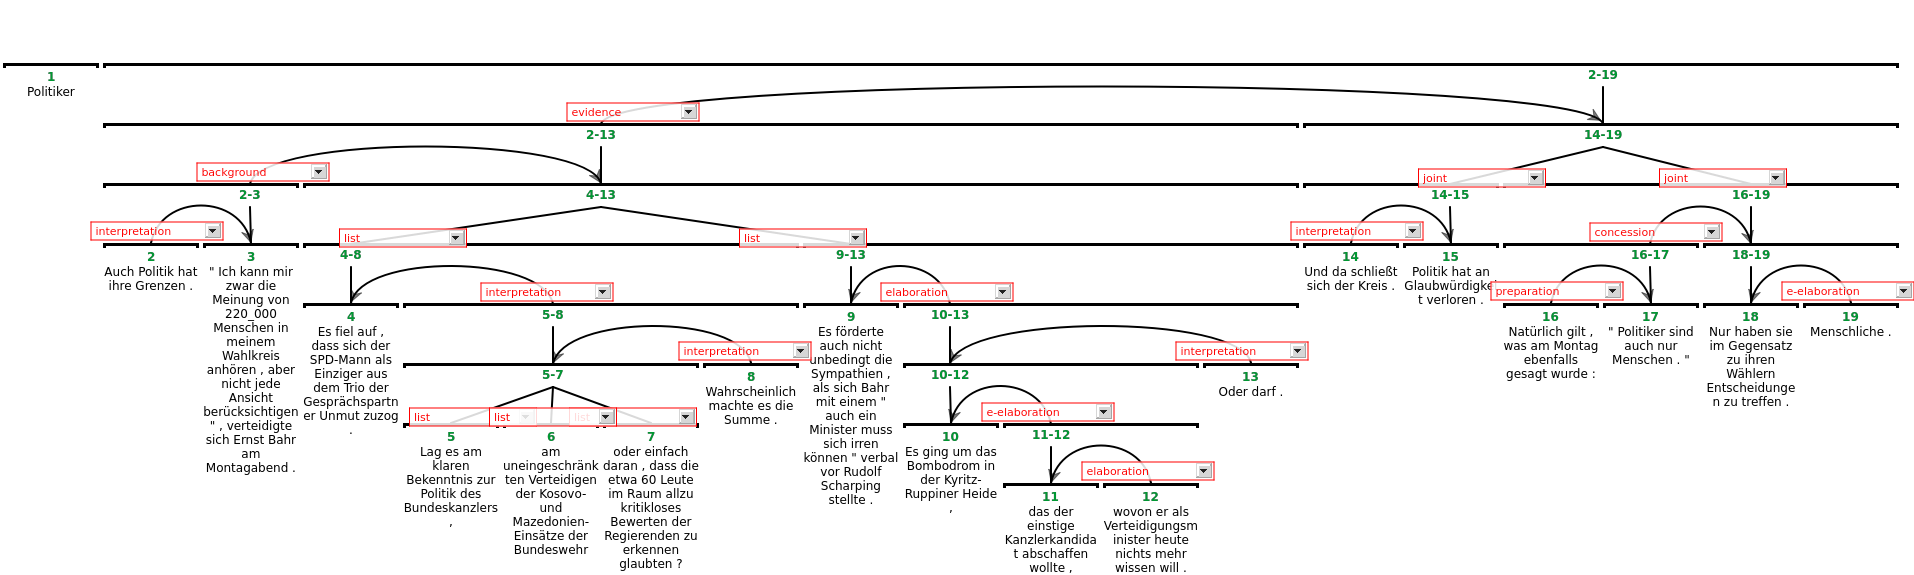

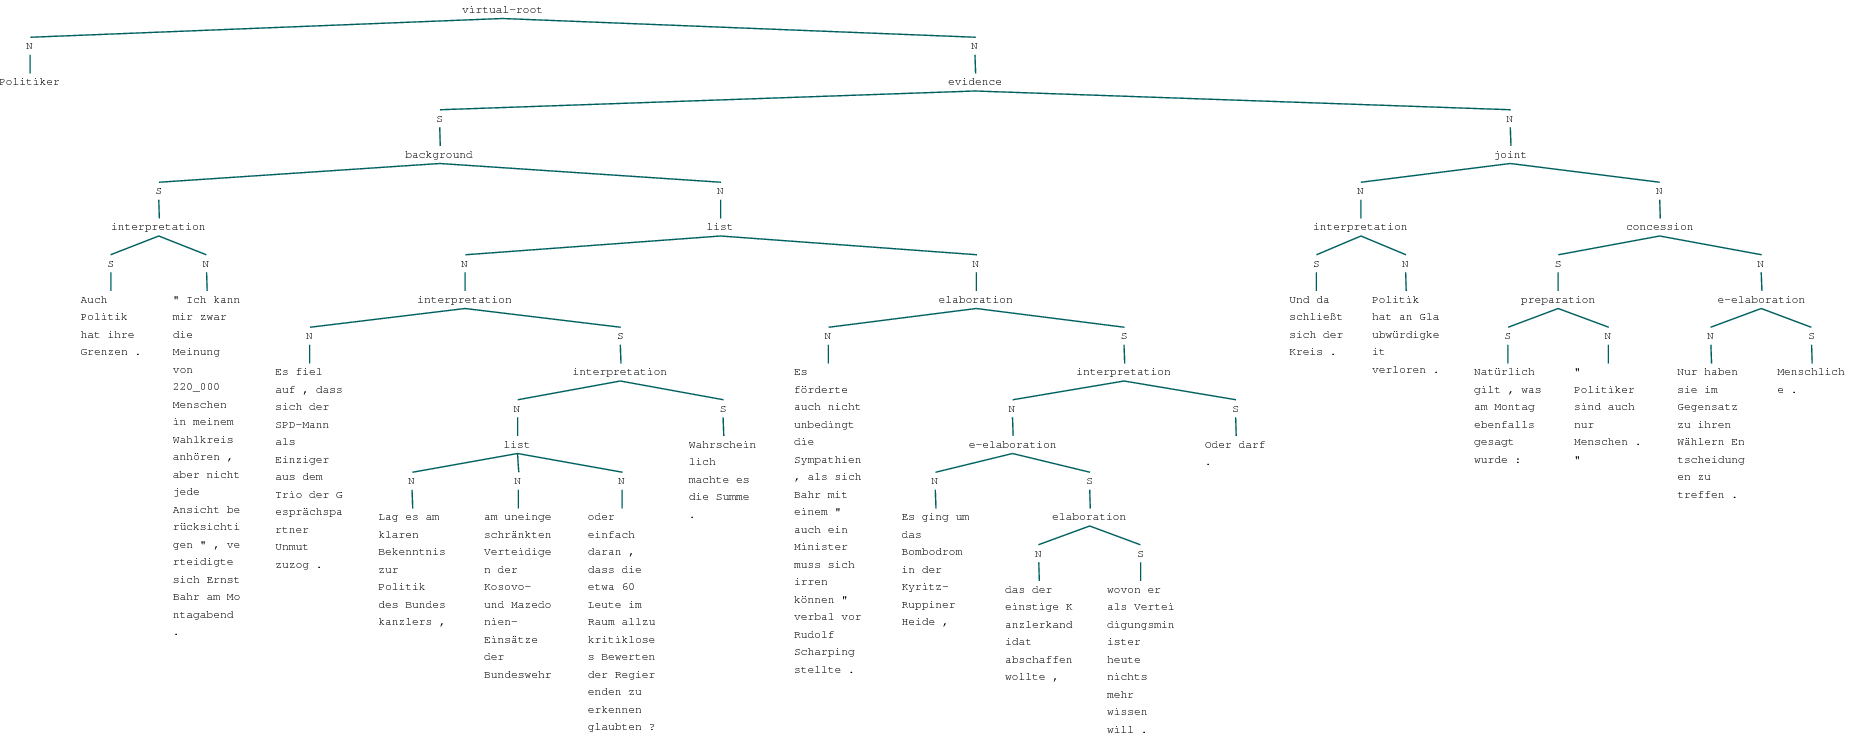

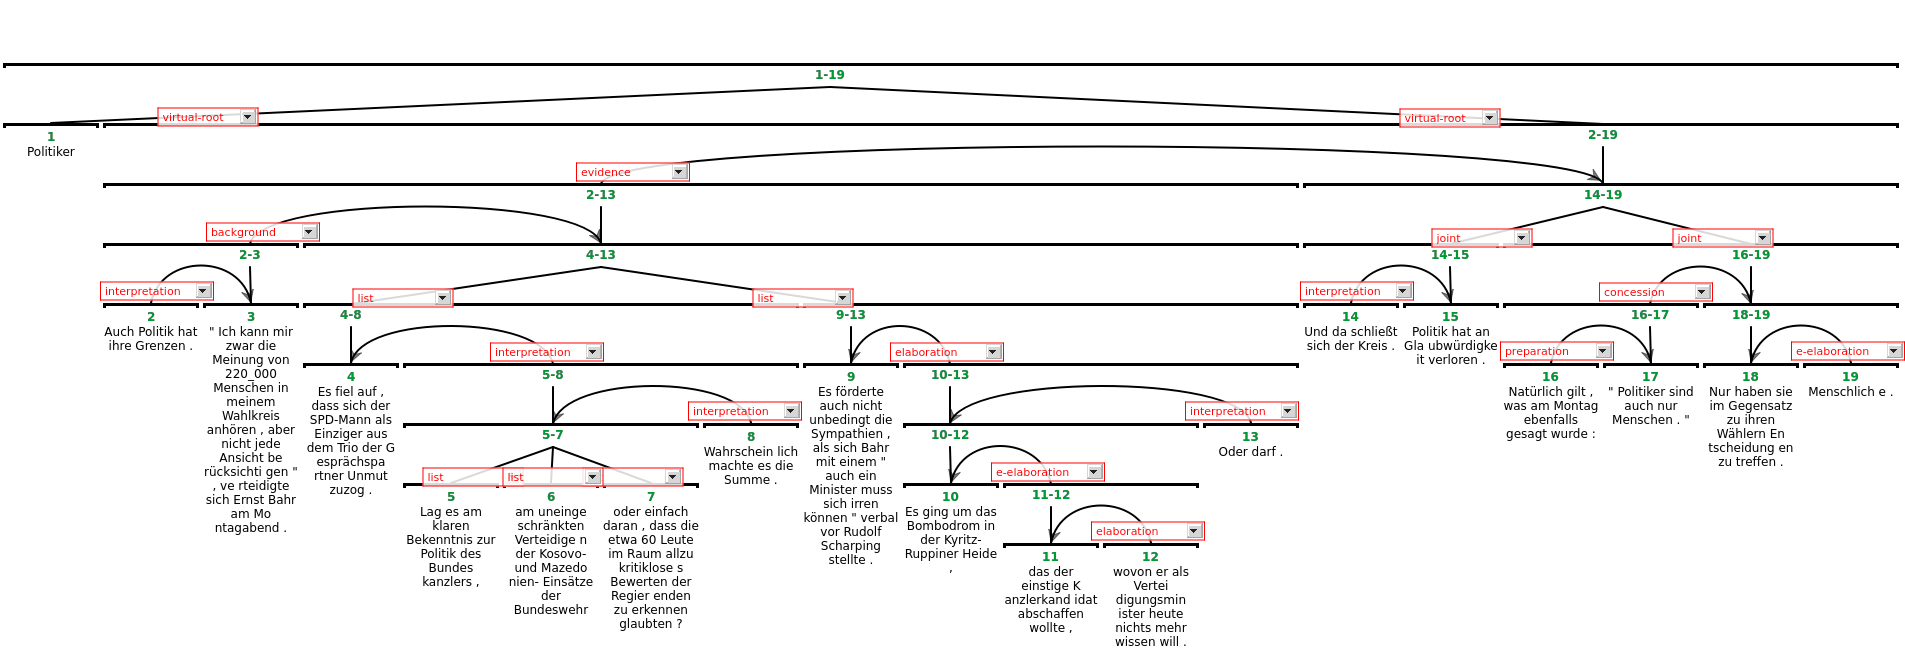

maz-6488.rs3


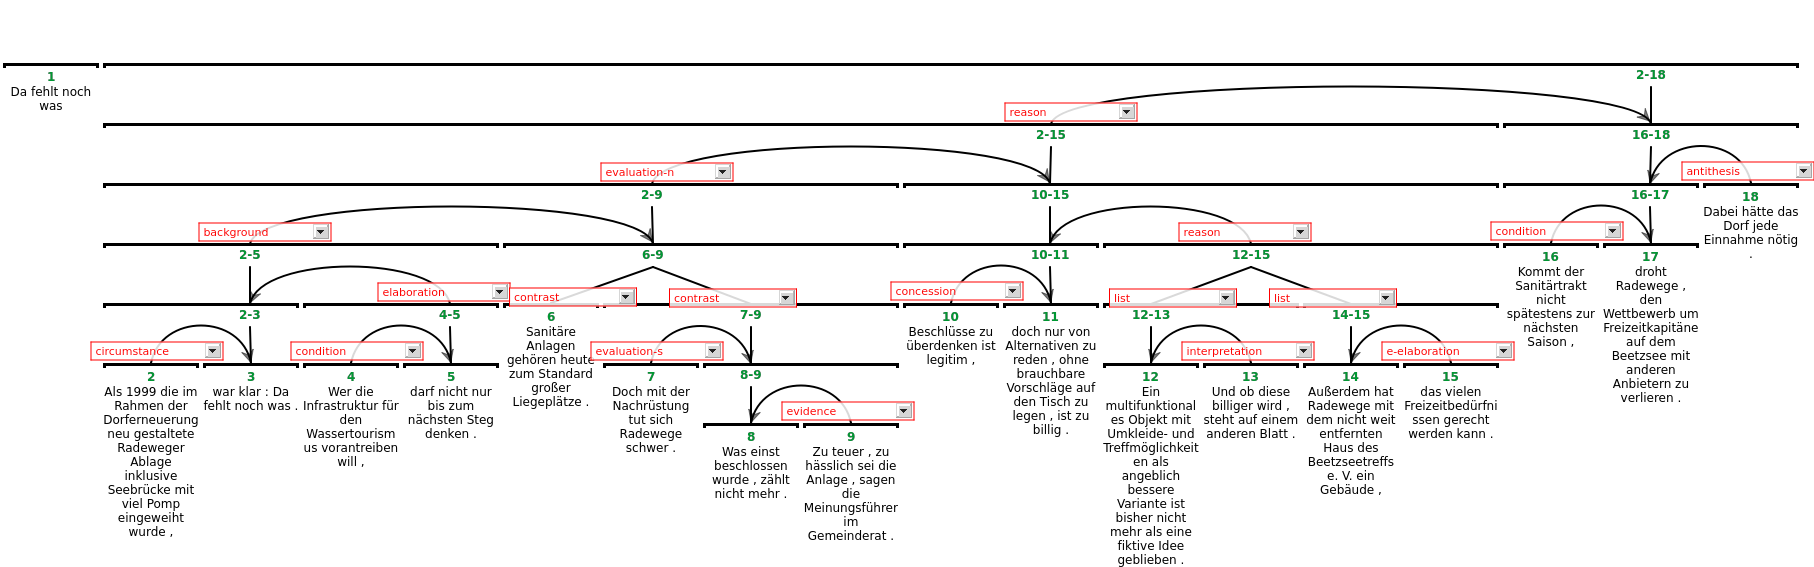

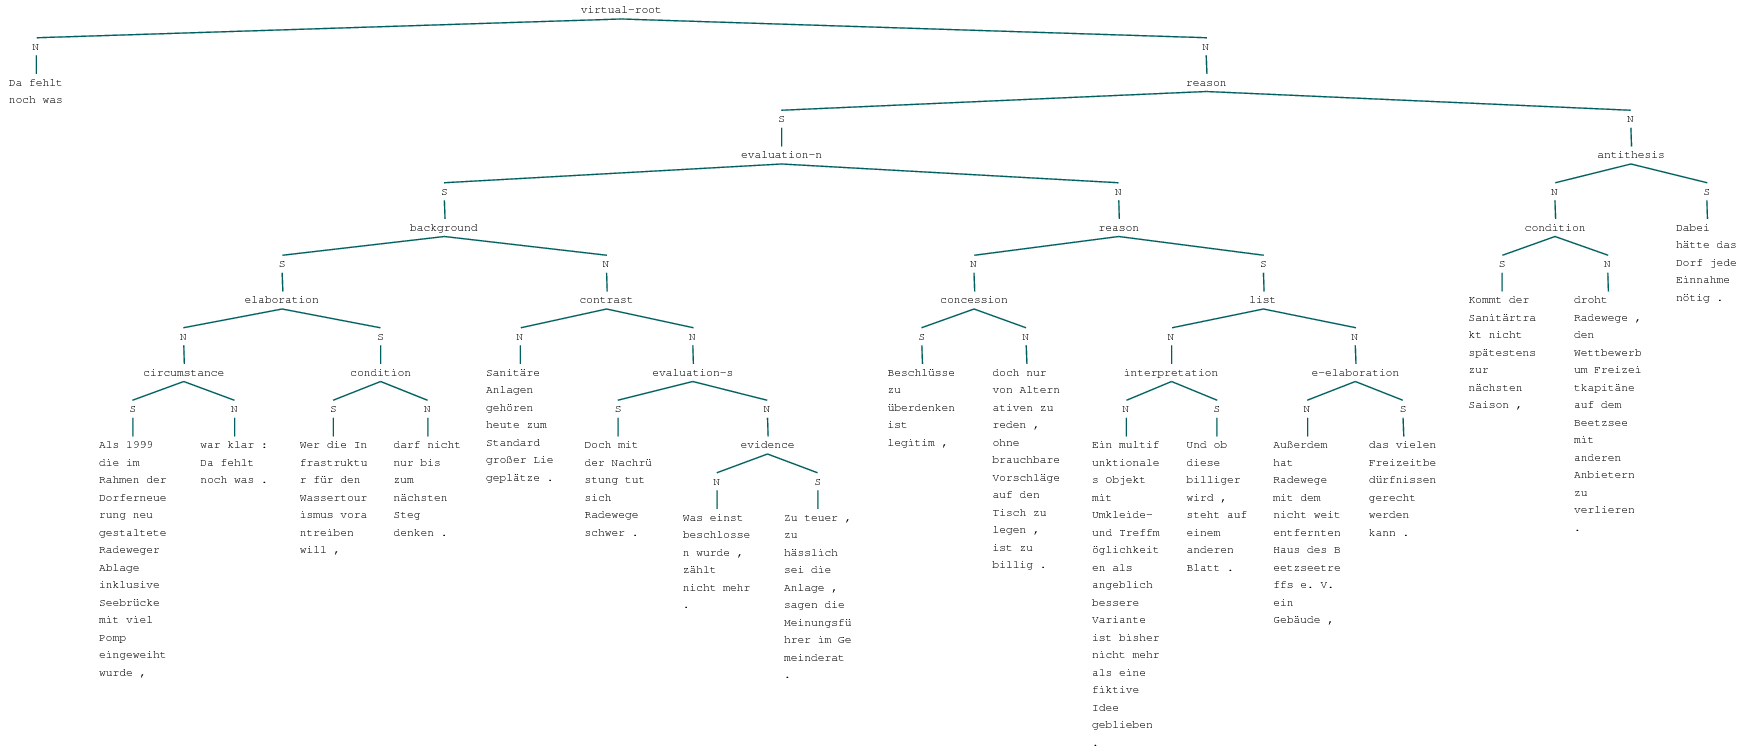

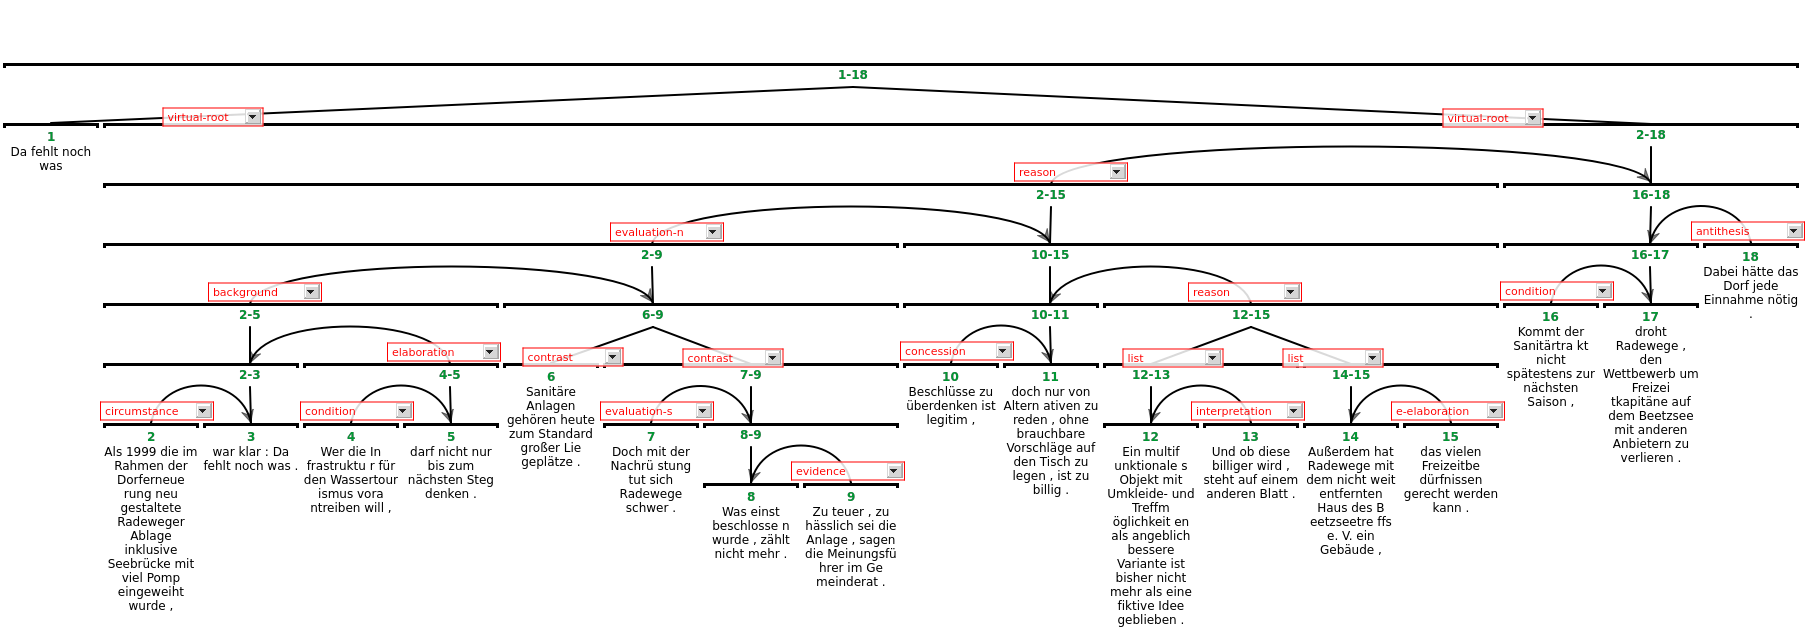

maz-7053.rs3


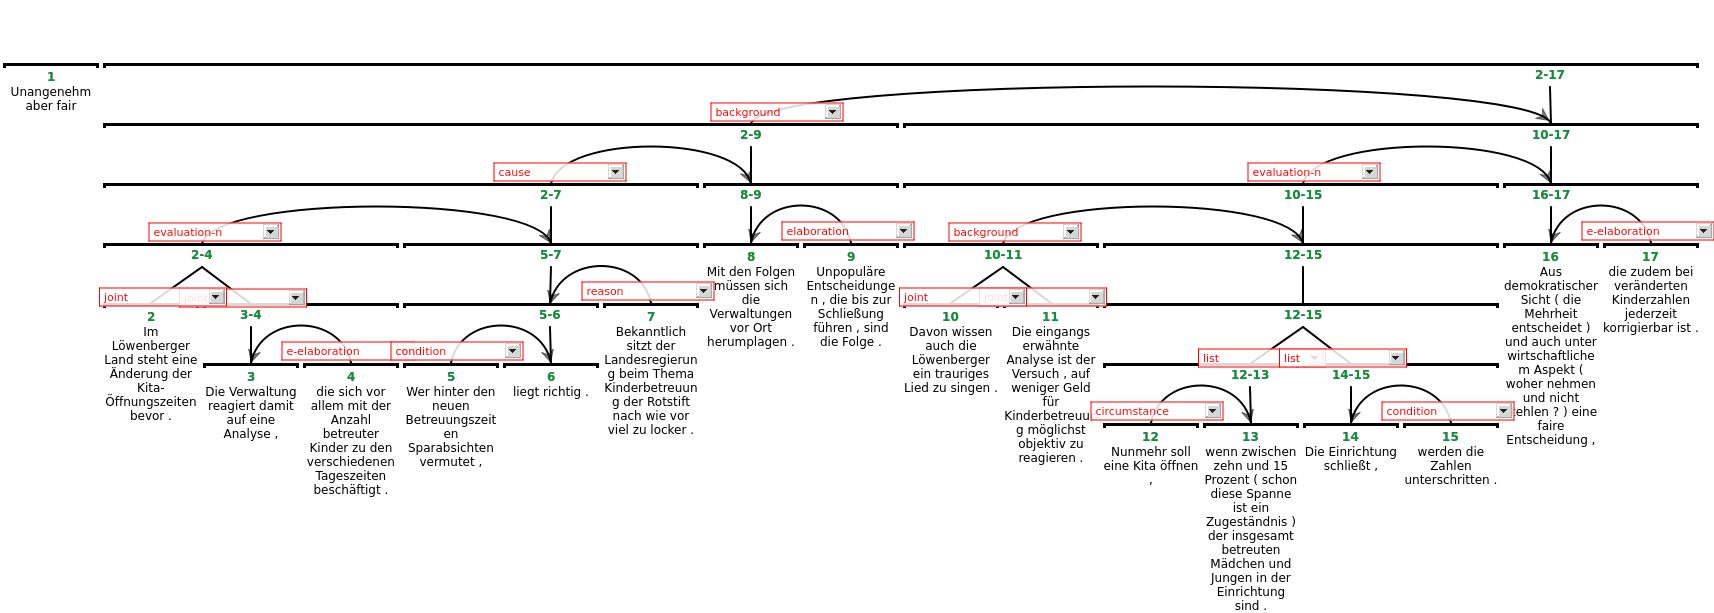

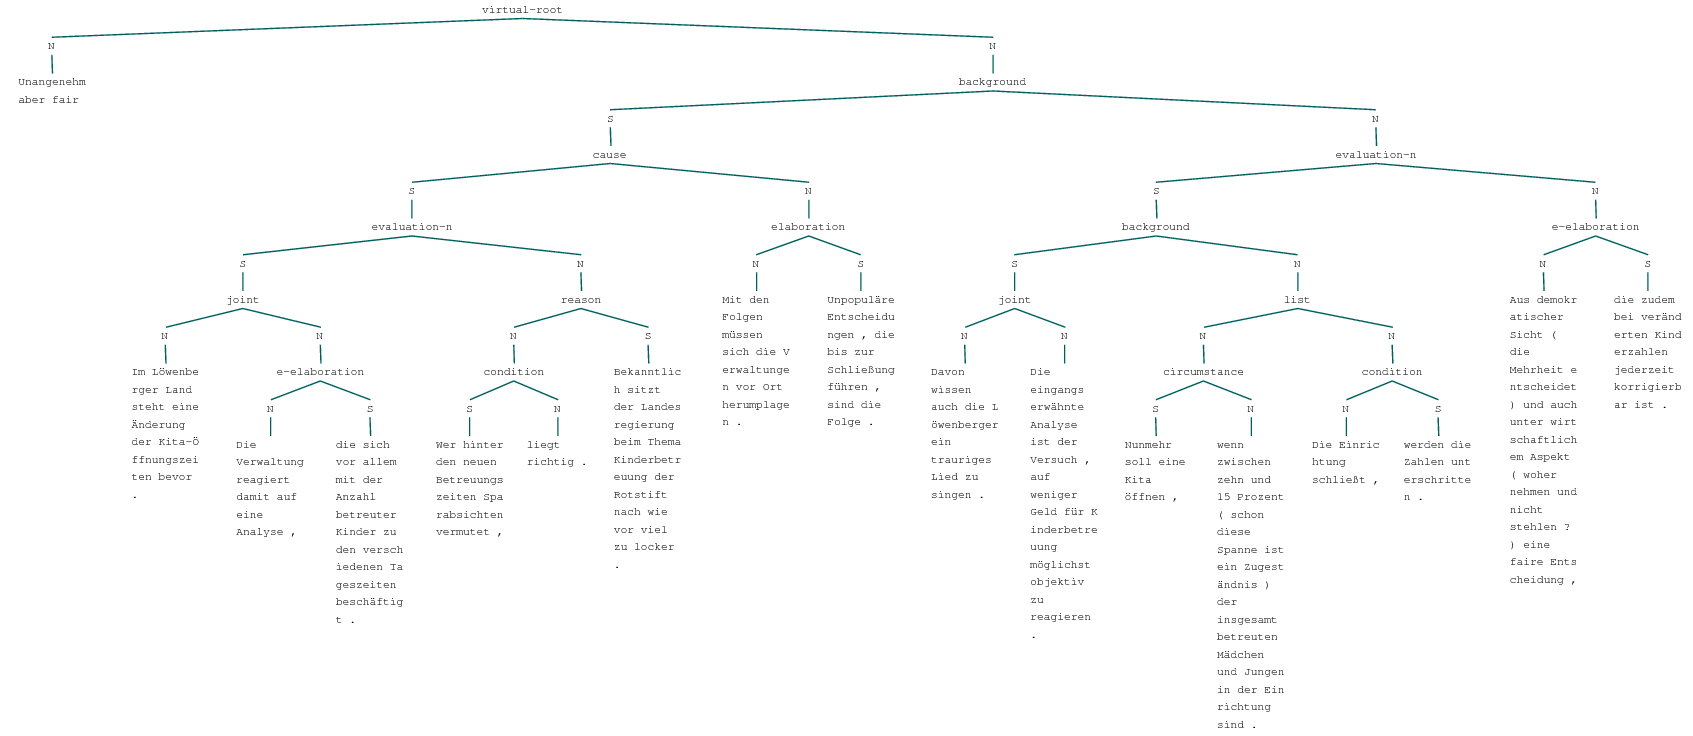

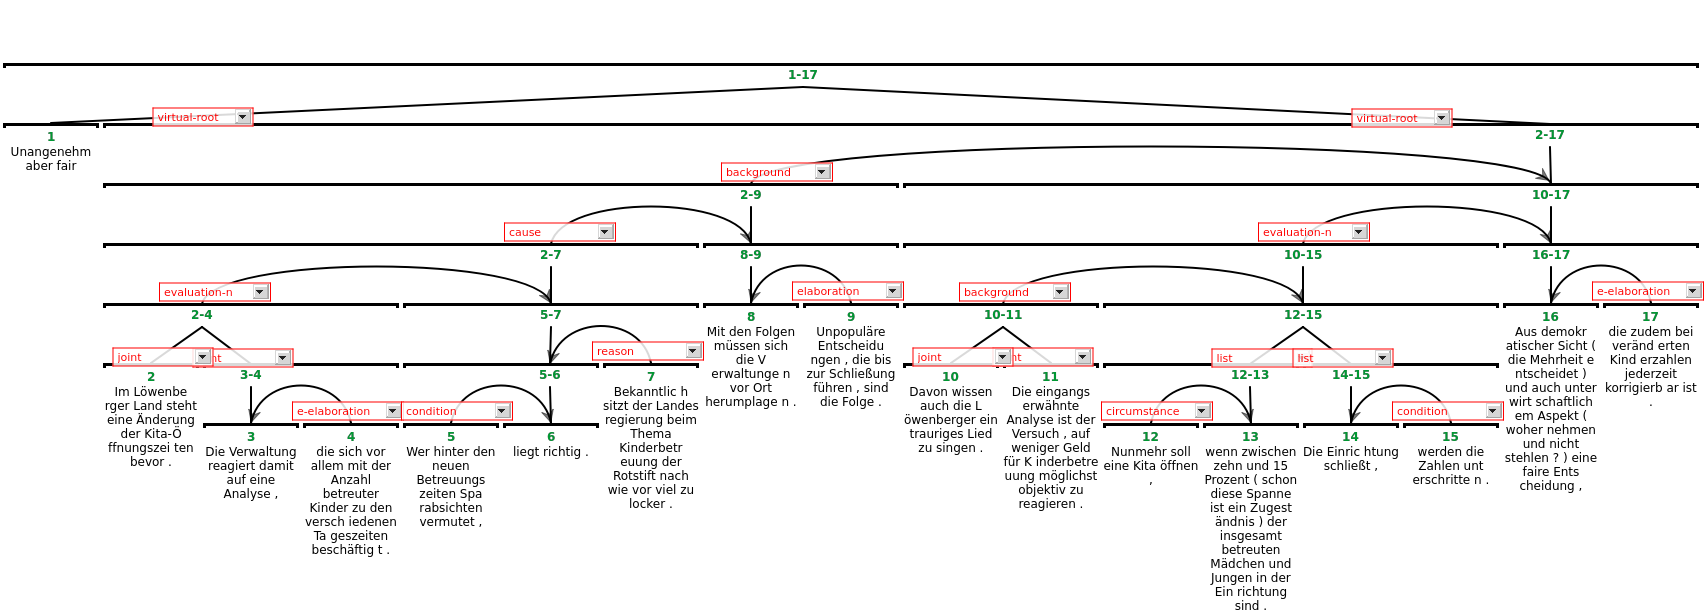

maz-10575.rs3


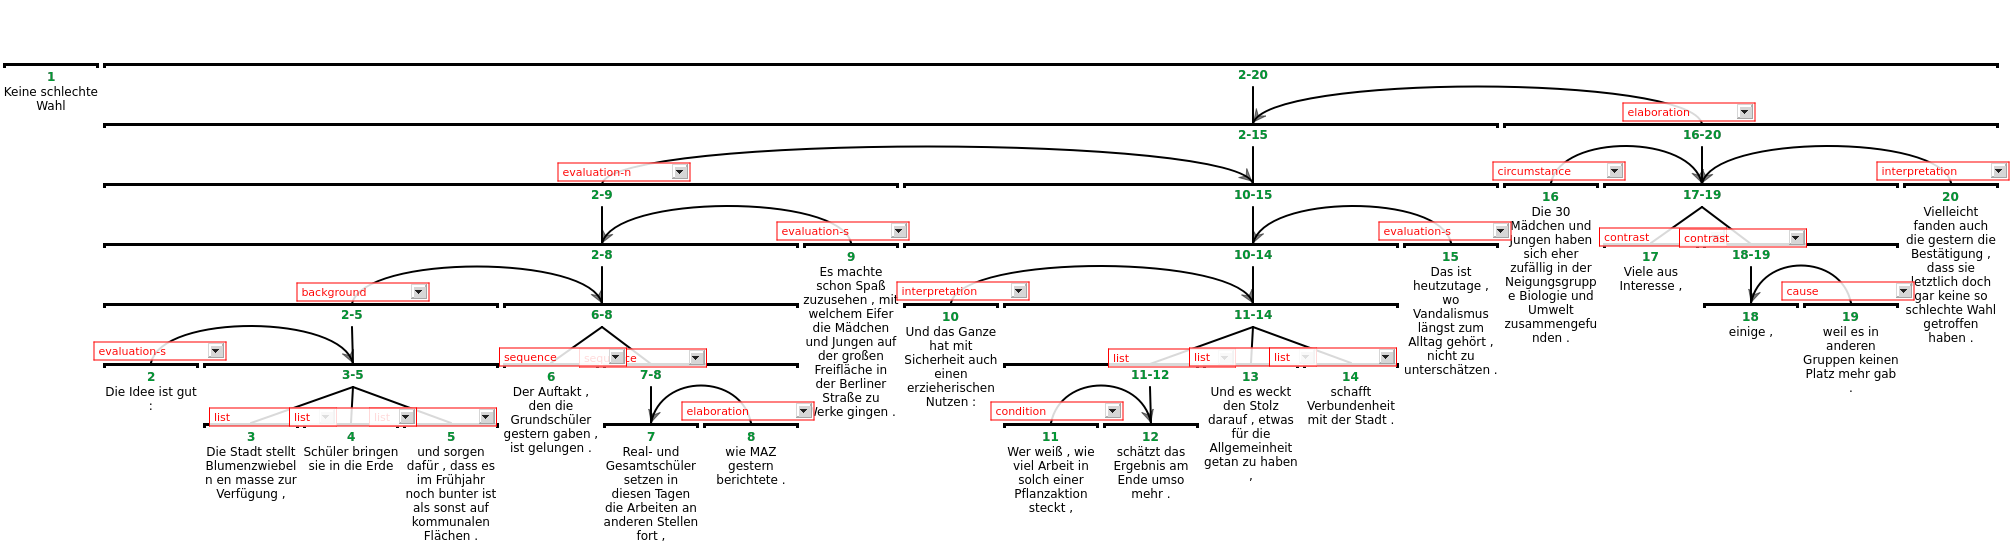

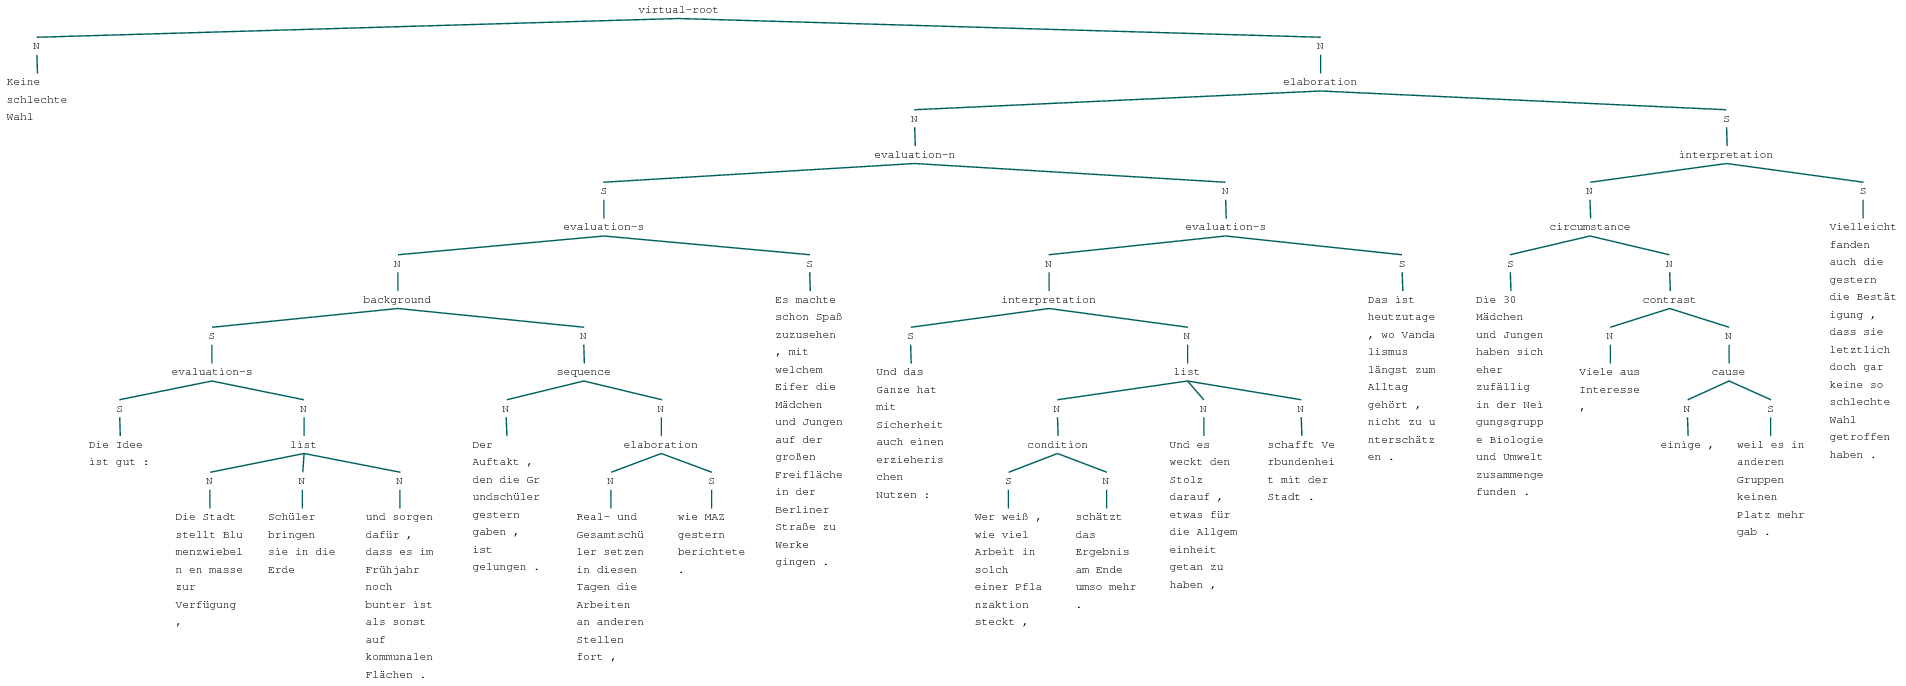

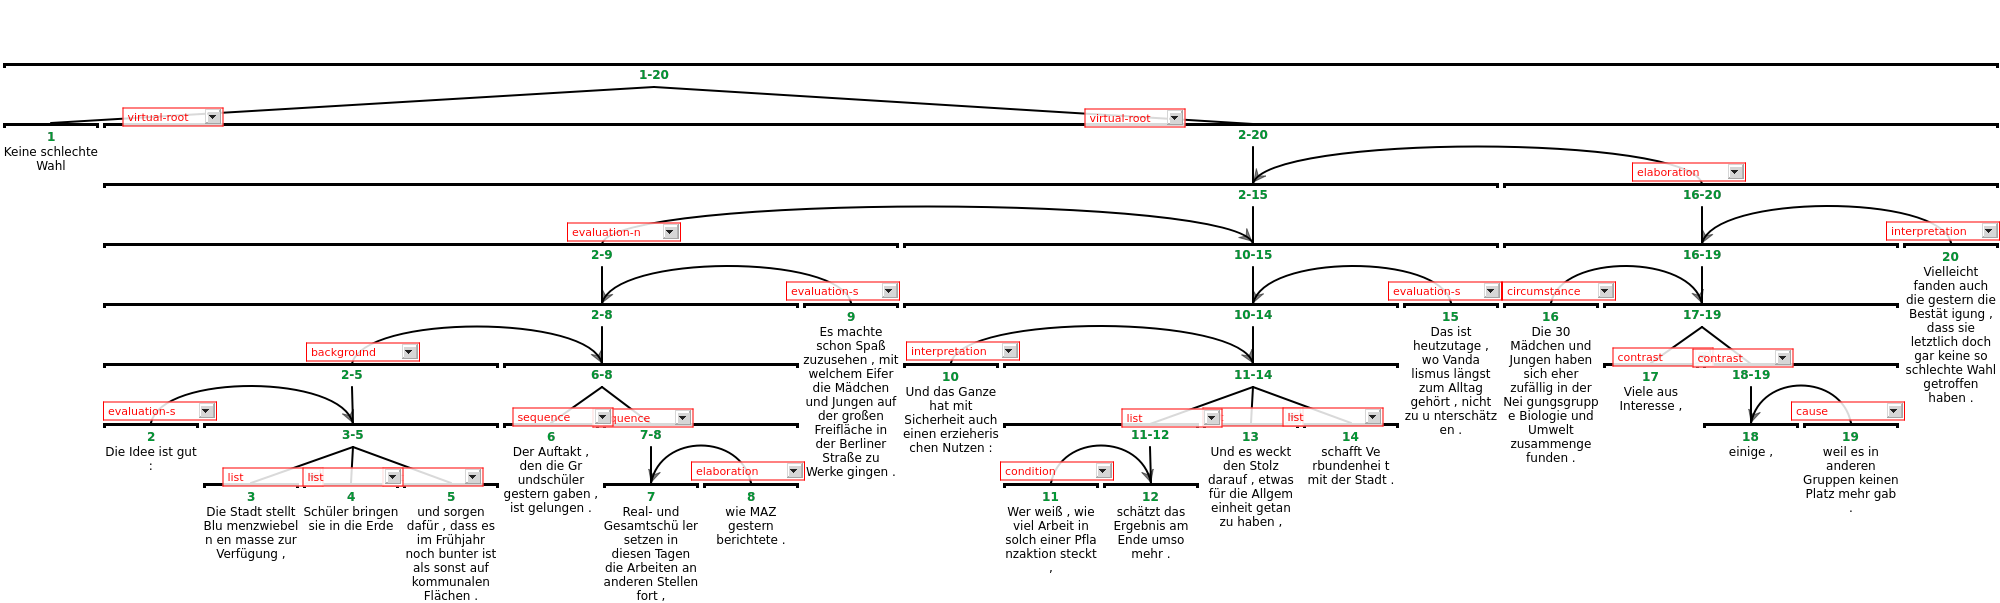

maz-3367.rs3


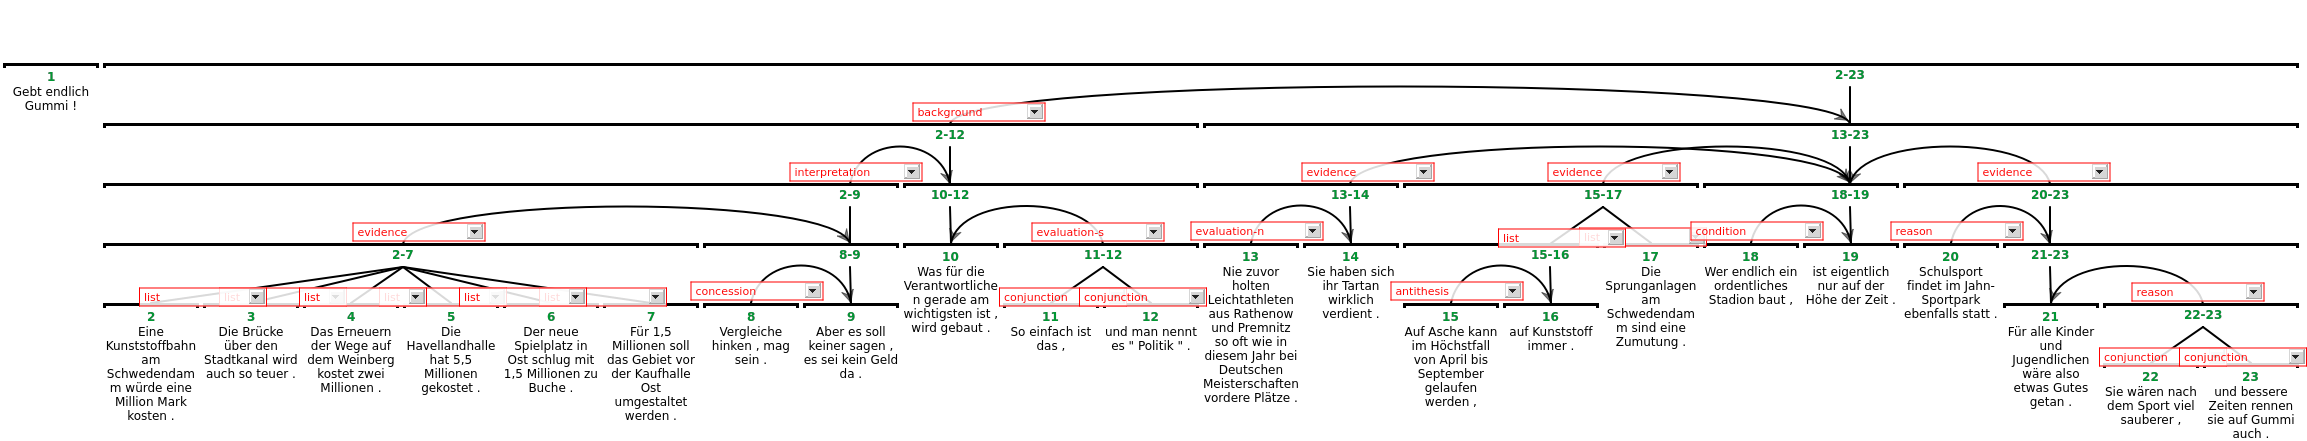

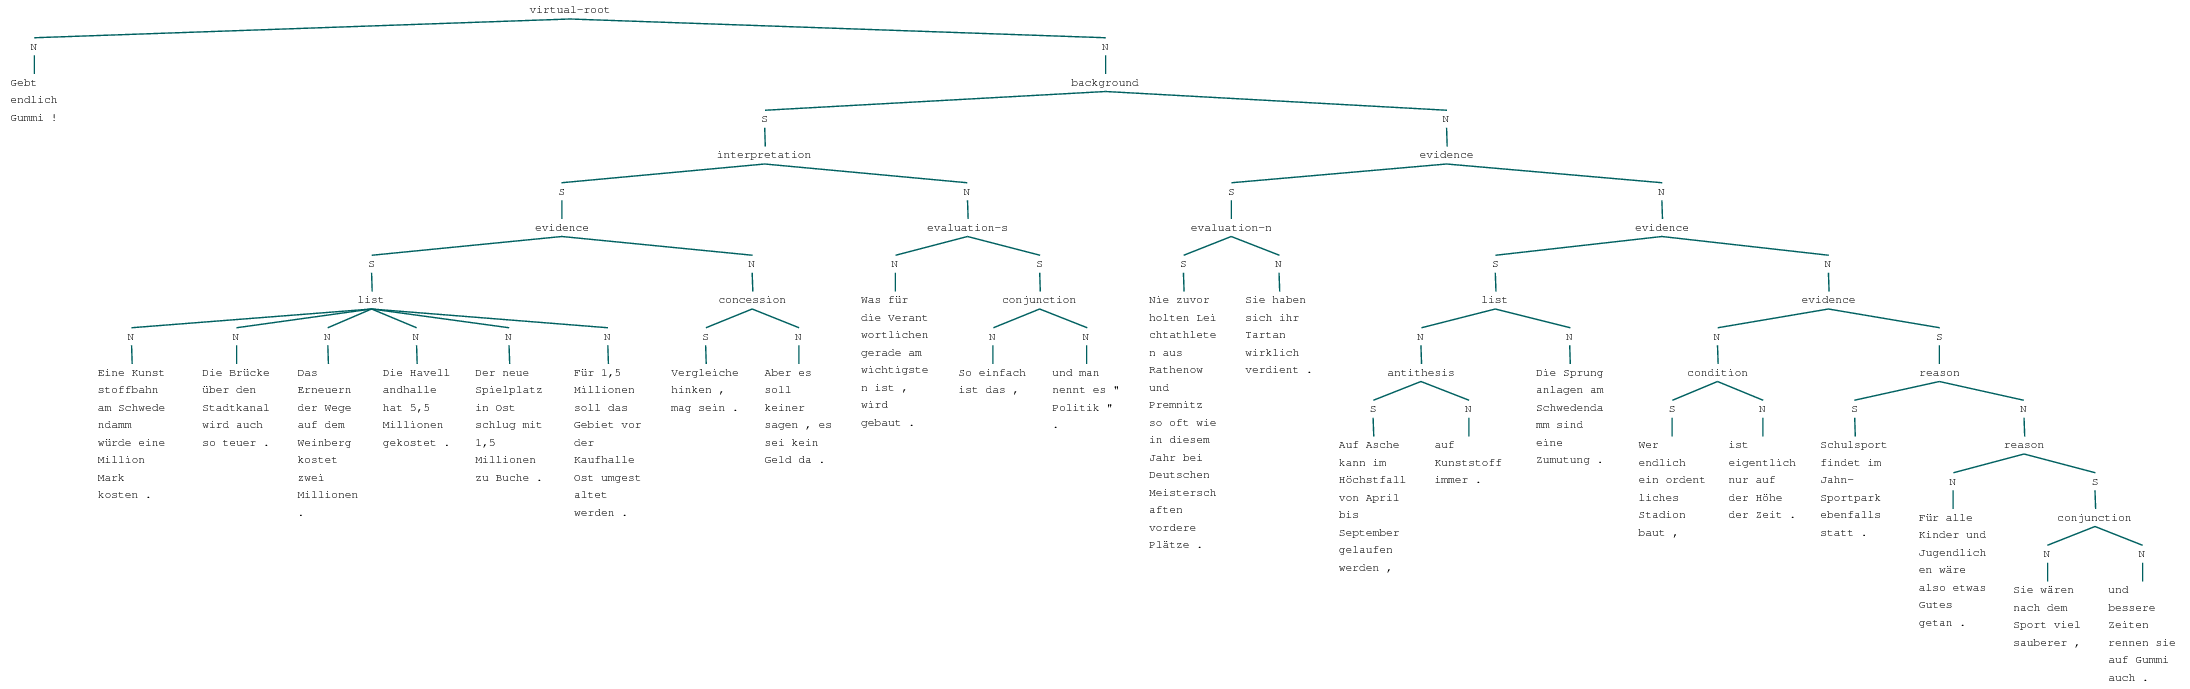

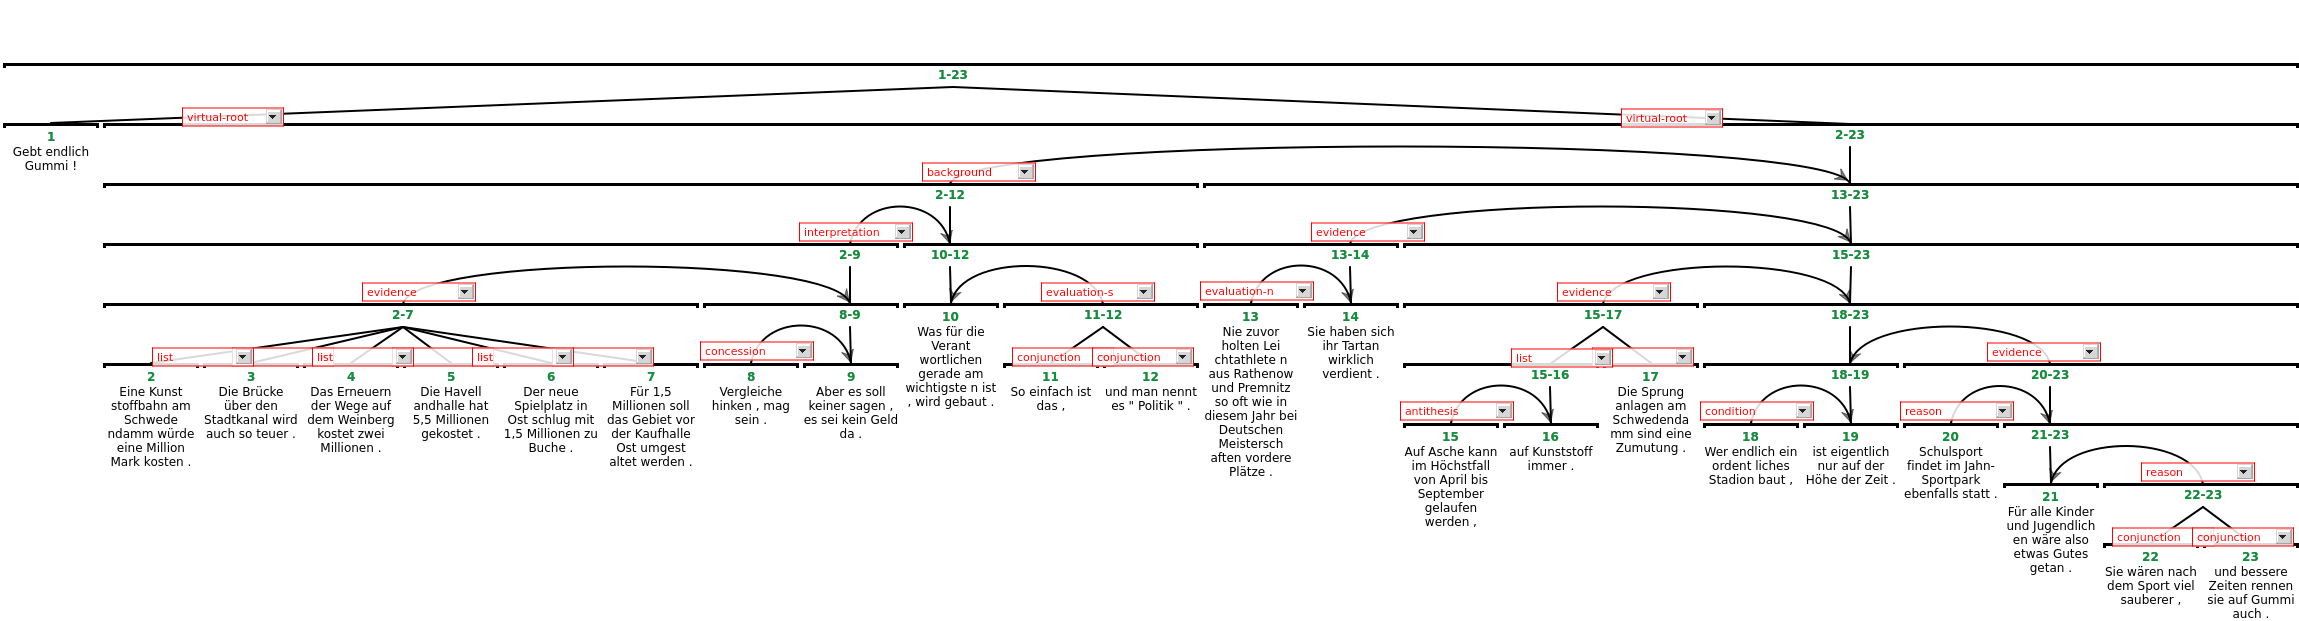

maz-8727.rs3


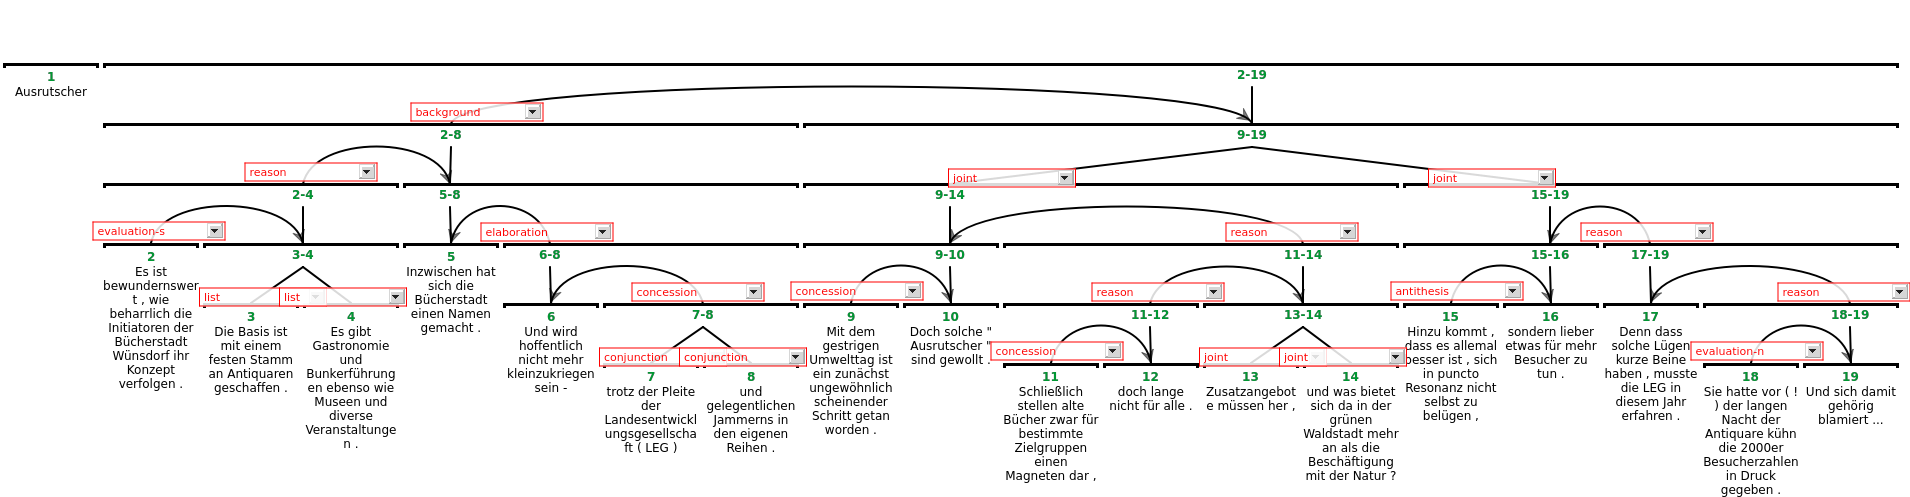

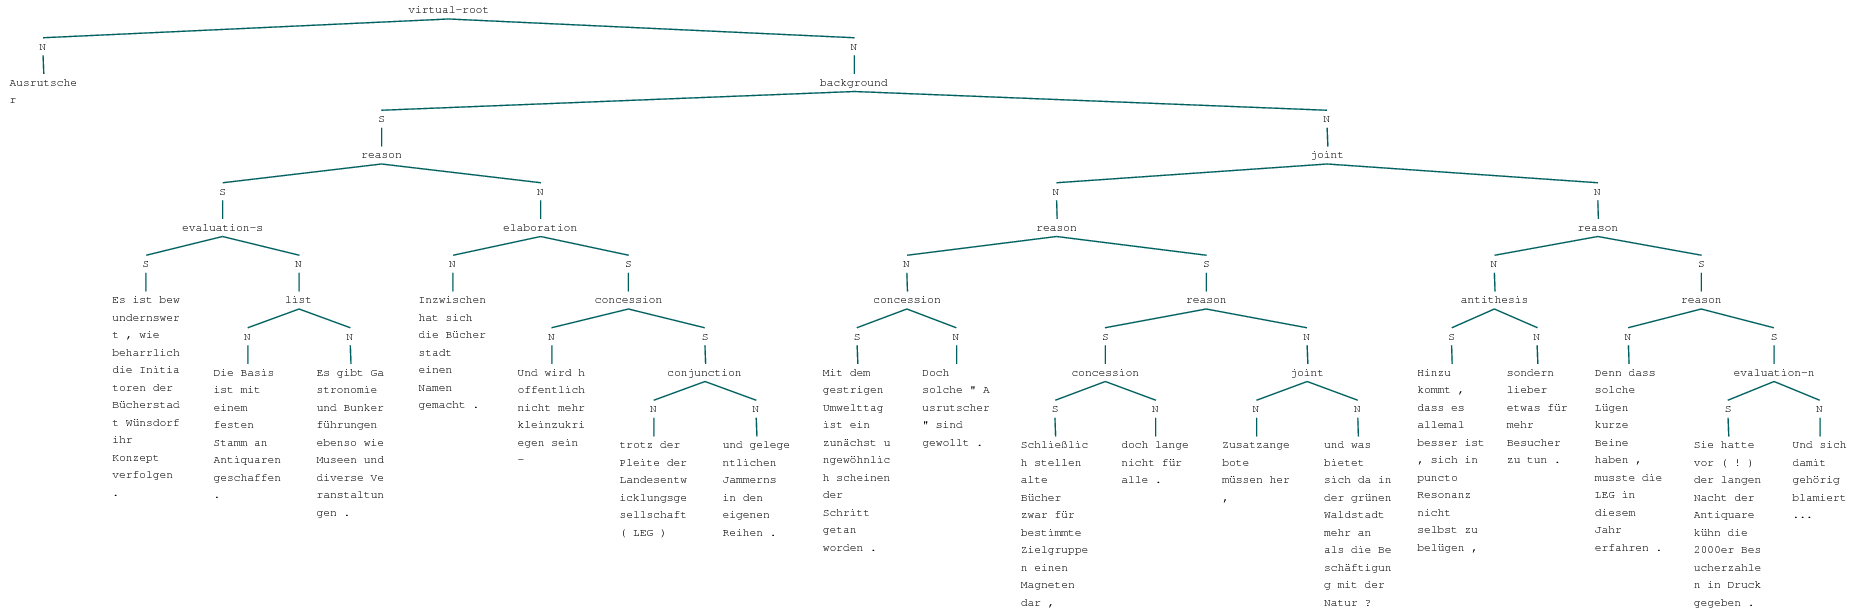

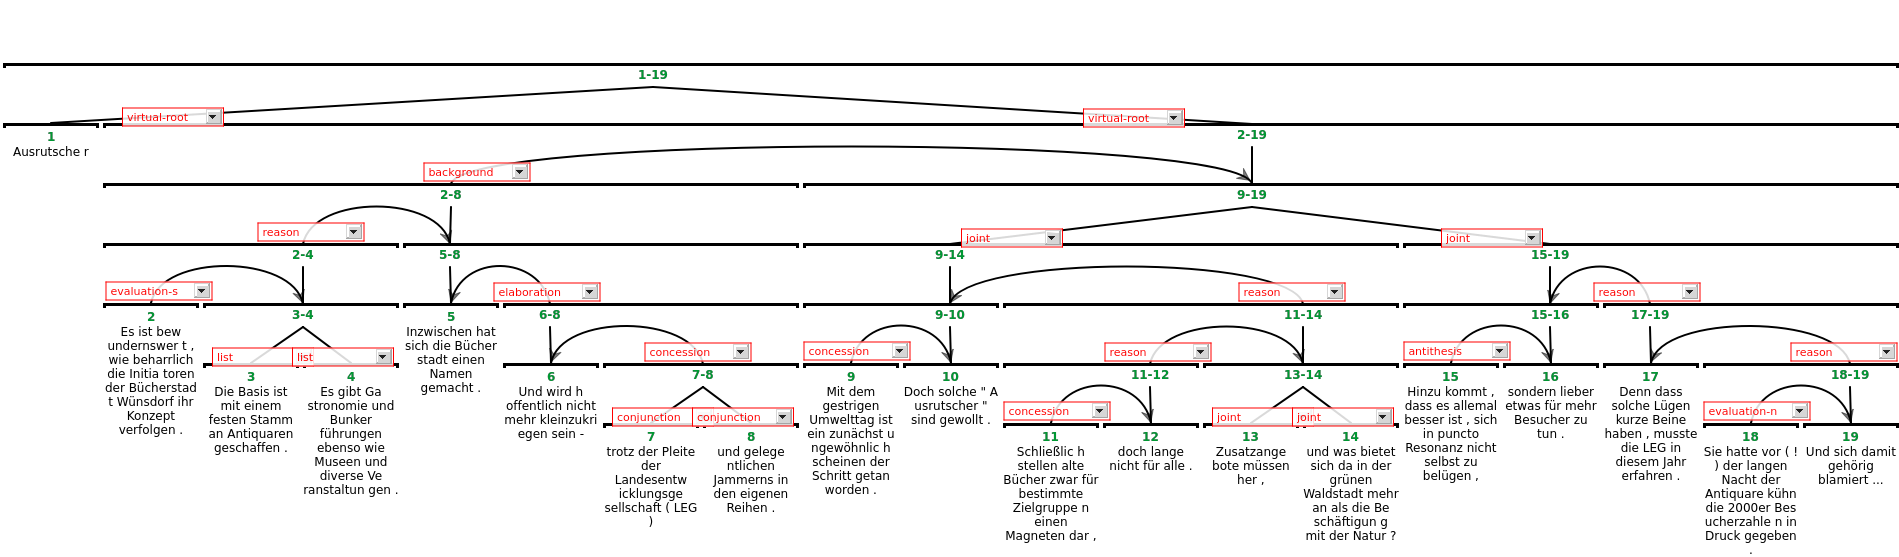

maz-12666.rs3


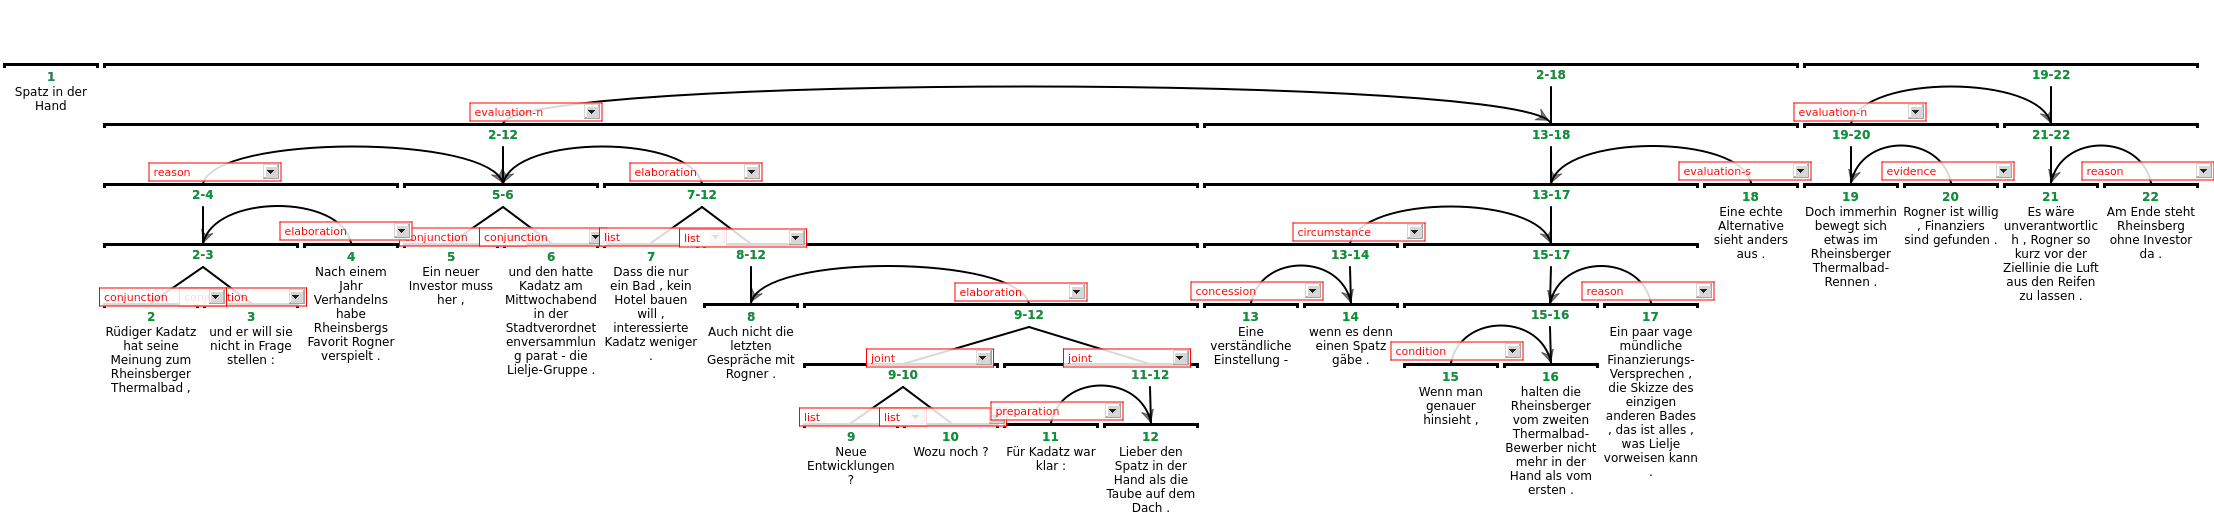

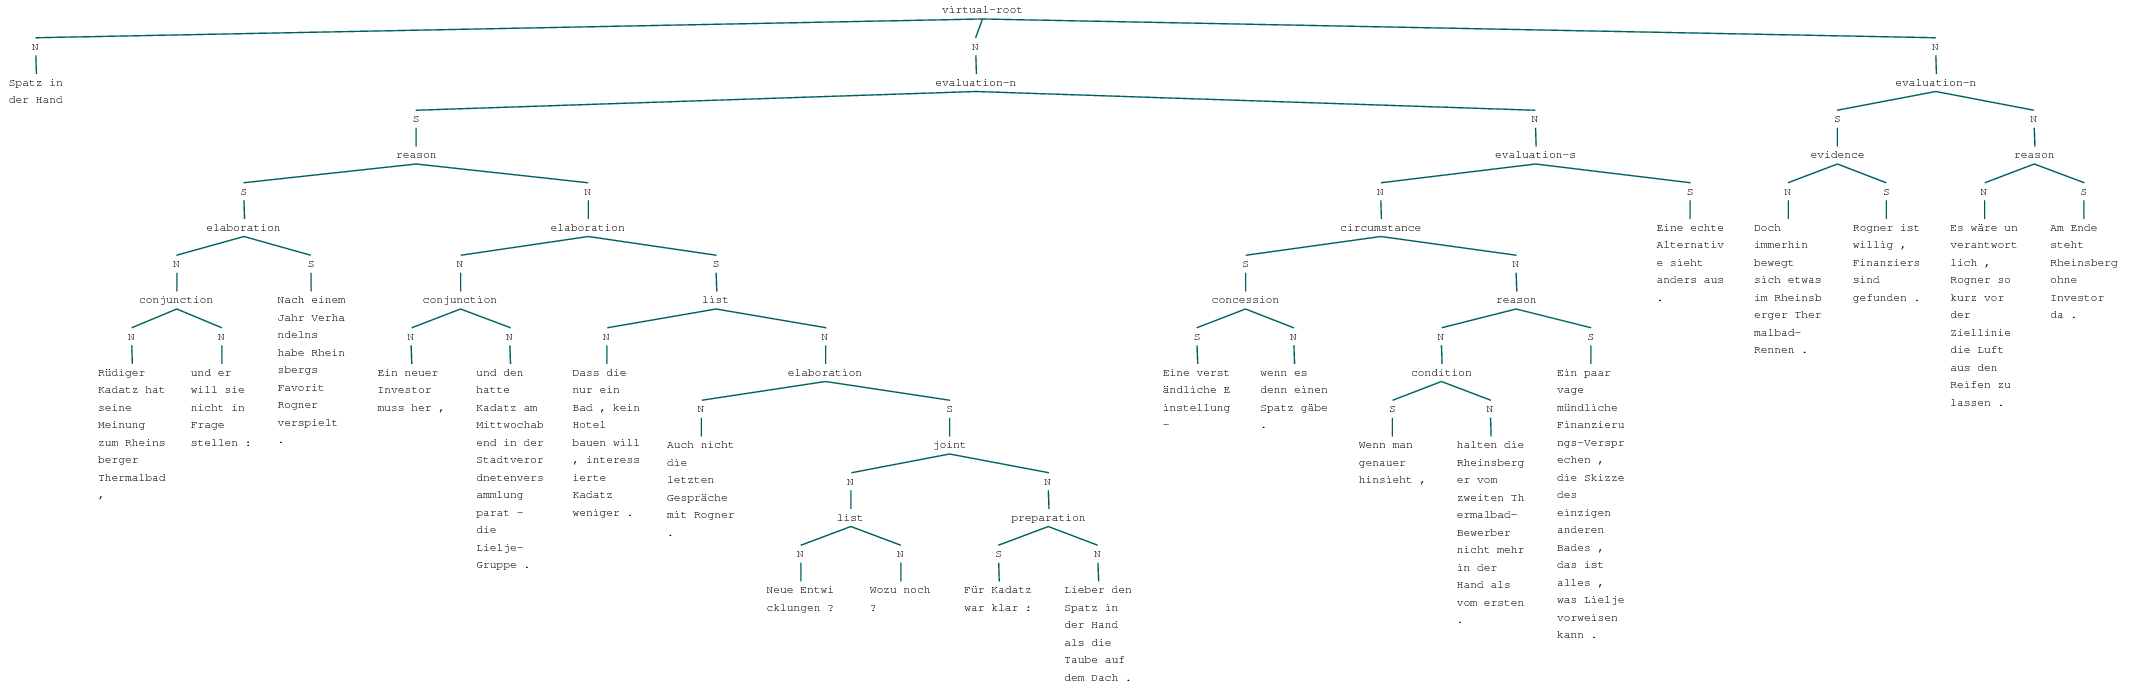

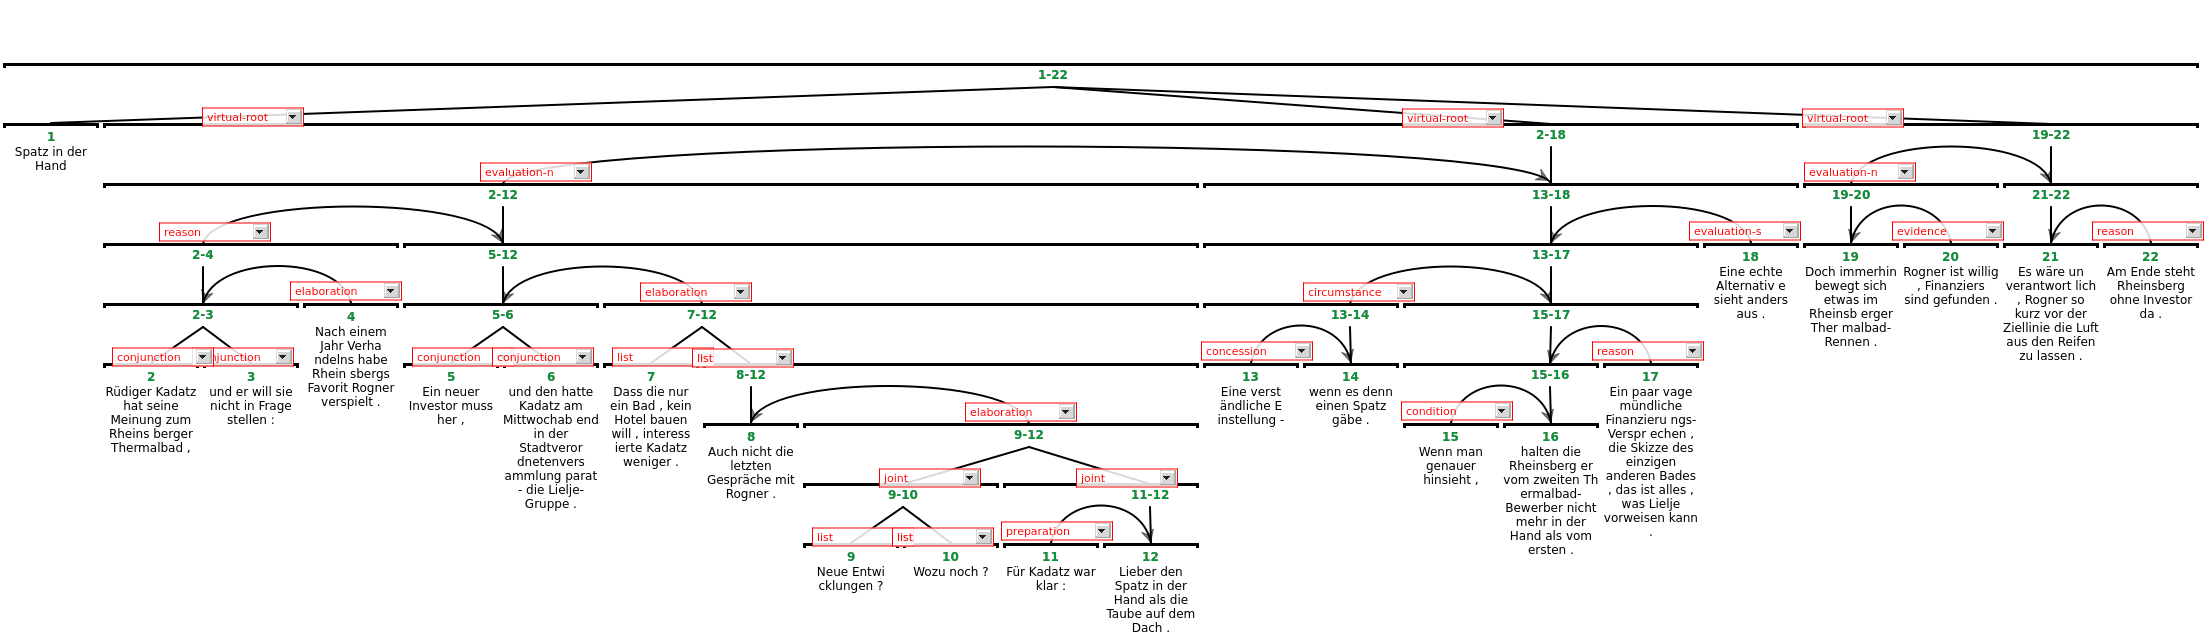

maz-13311.rs3


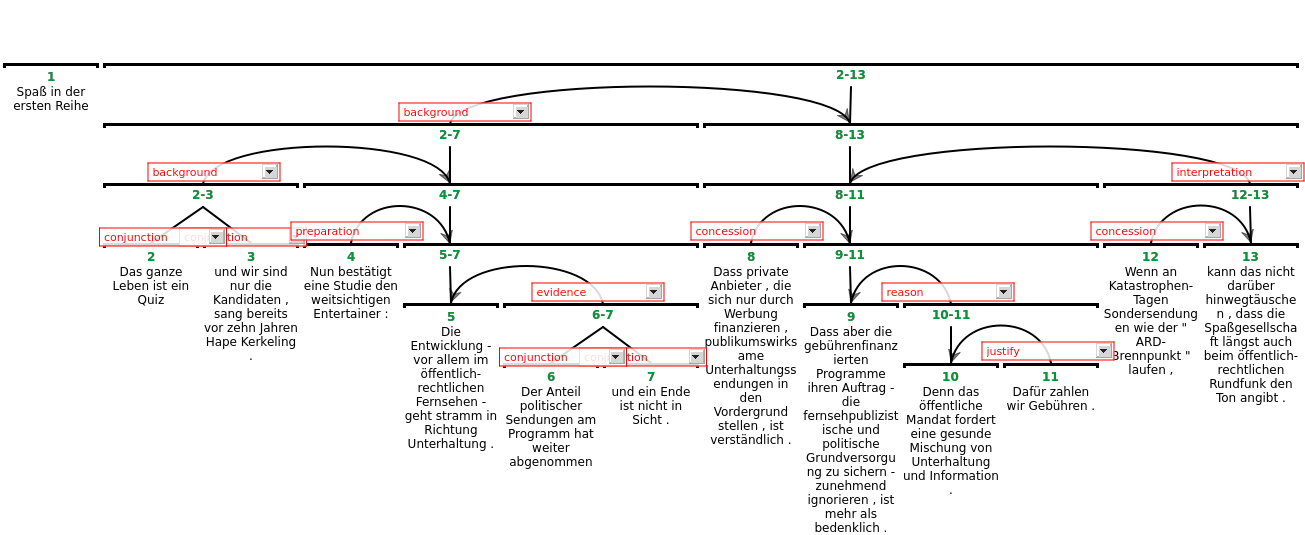

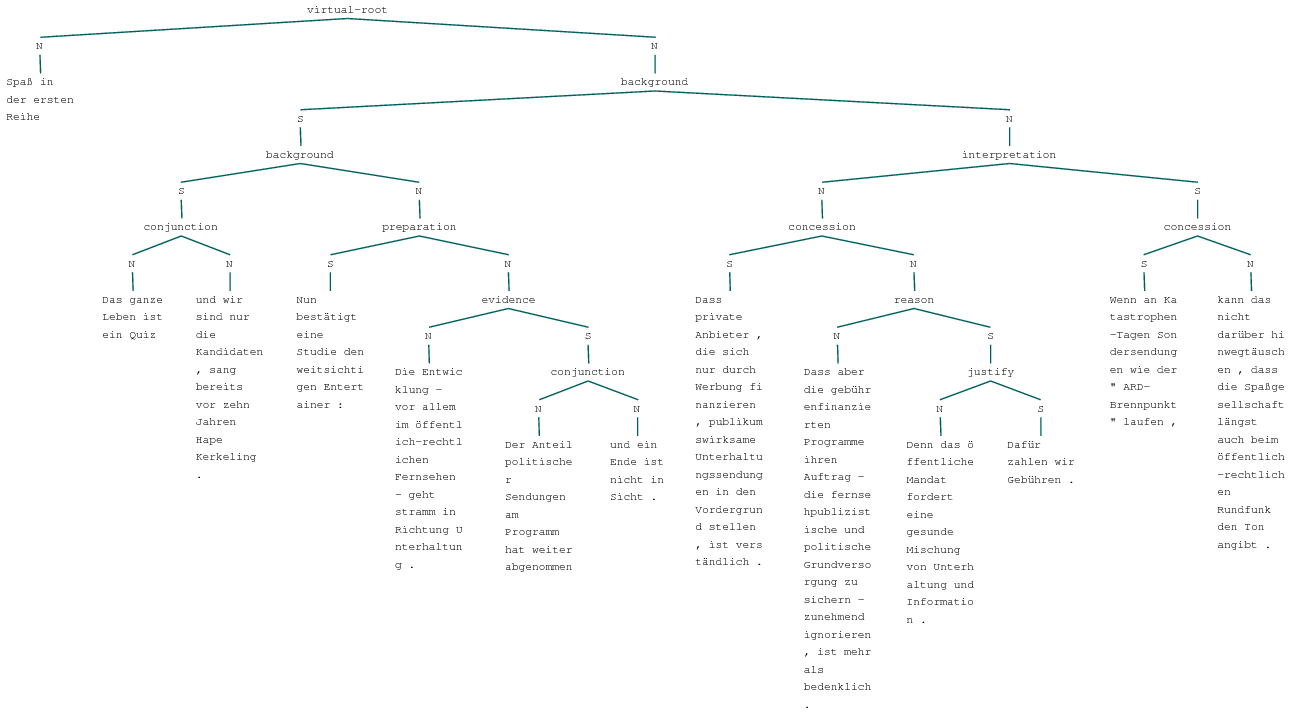

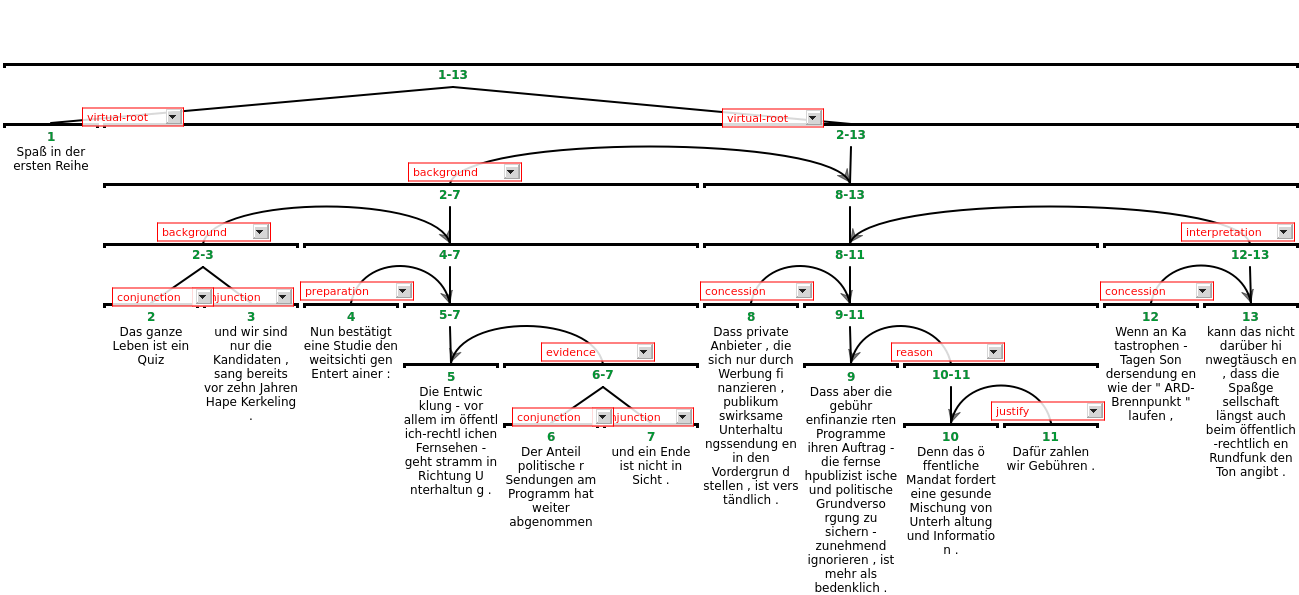

maz-17242.rs3


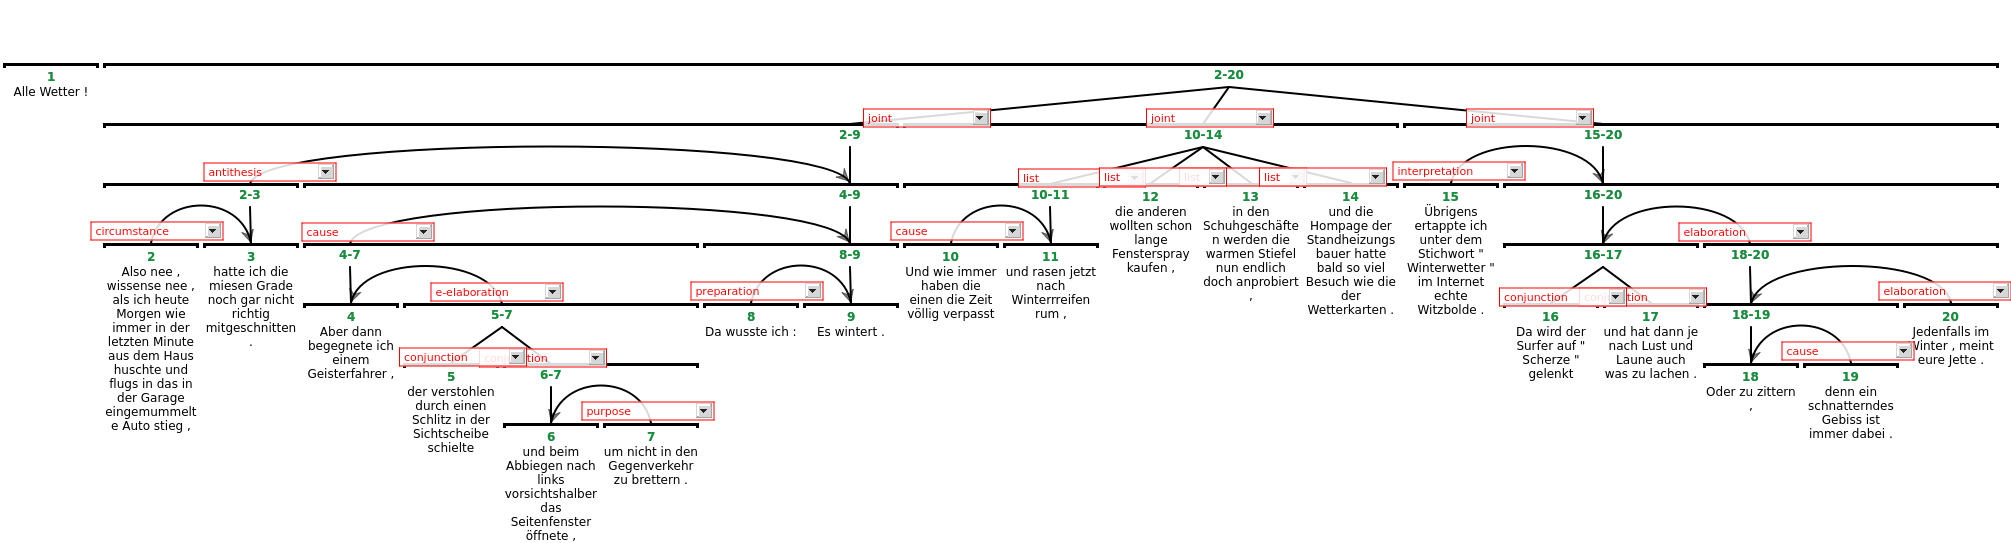

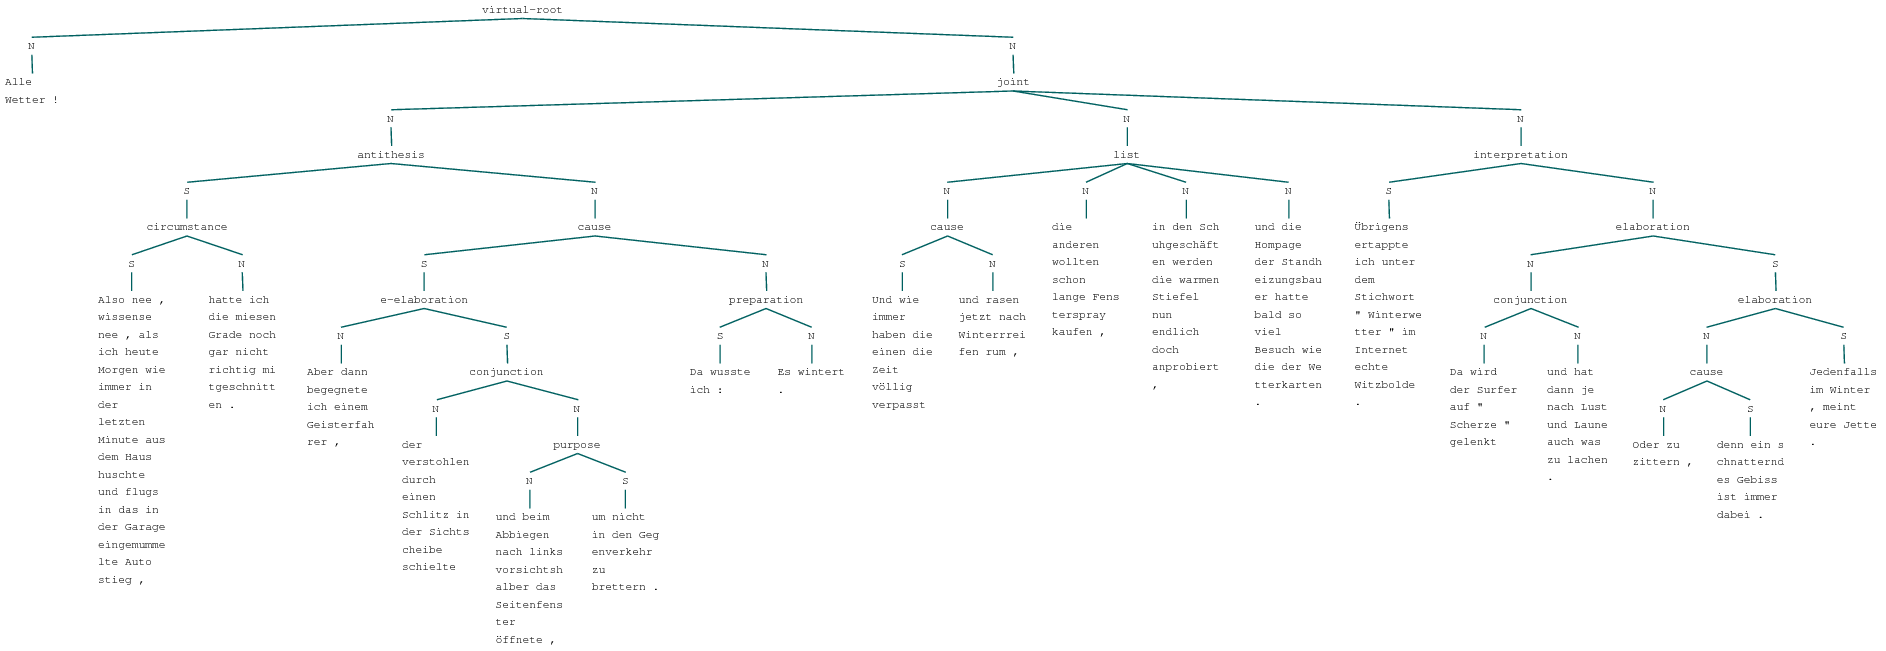

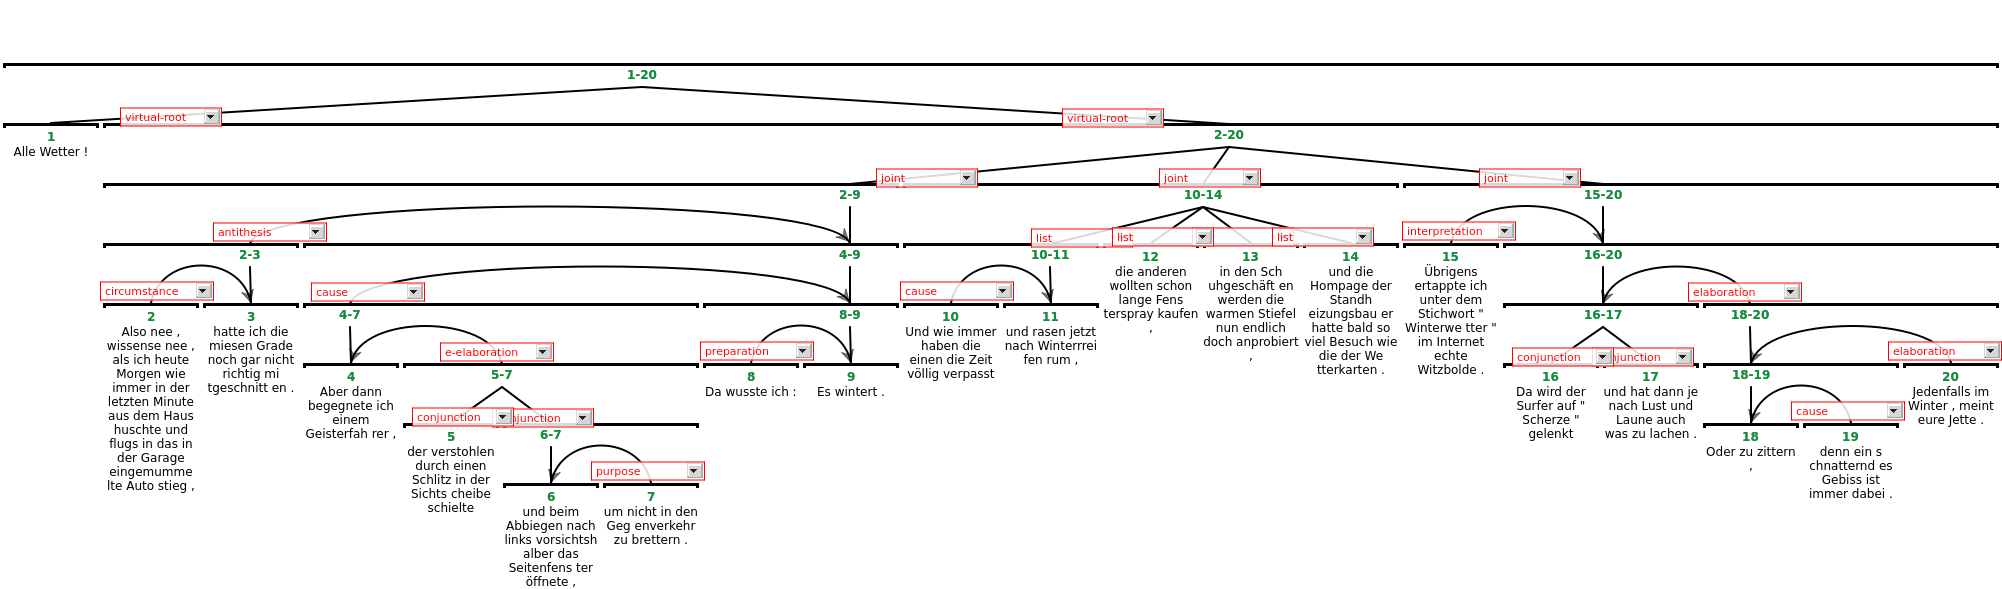

maz-3110.rs3


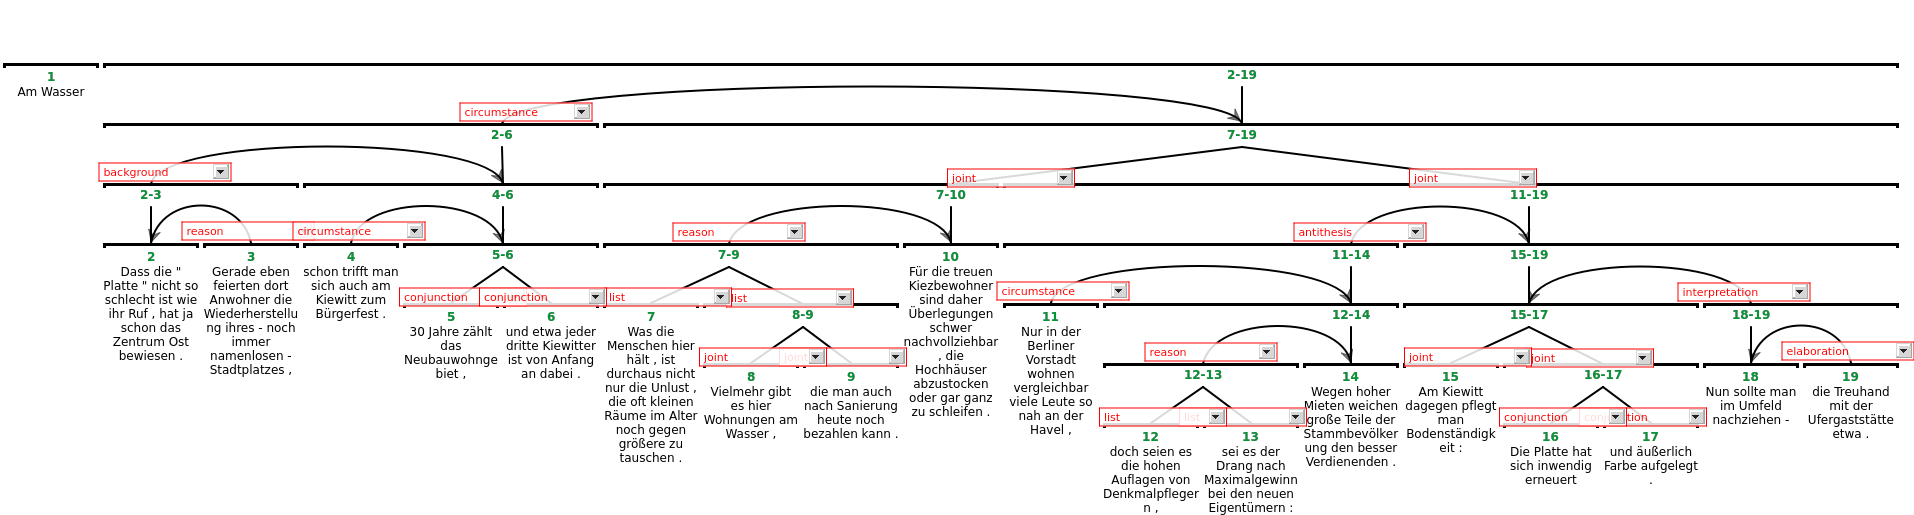

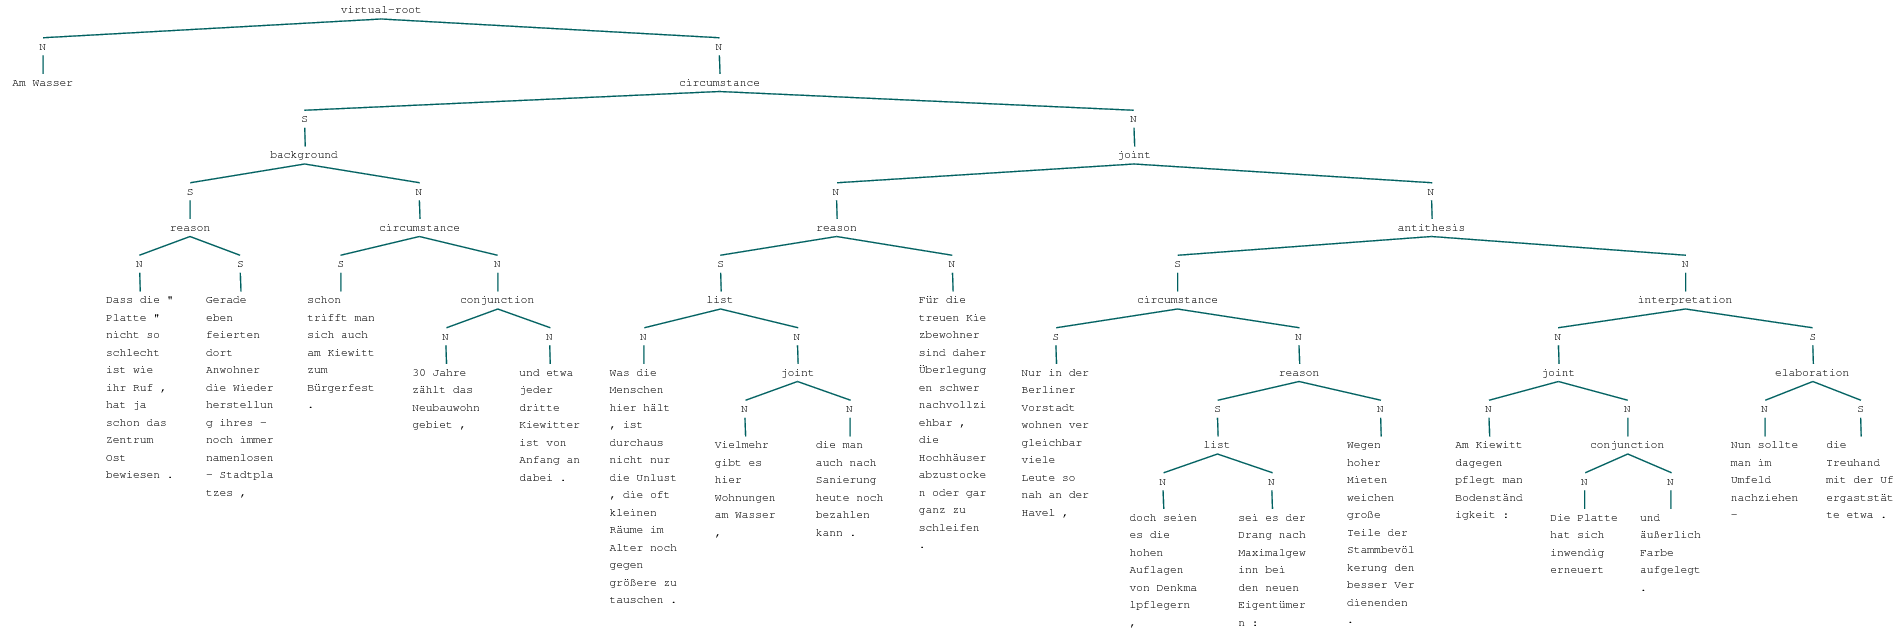

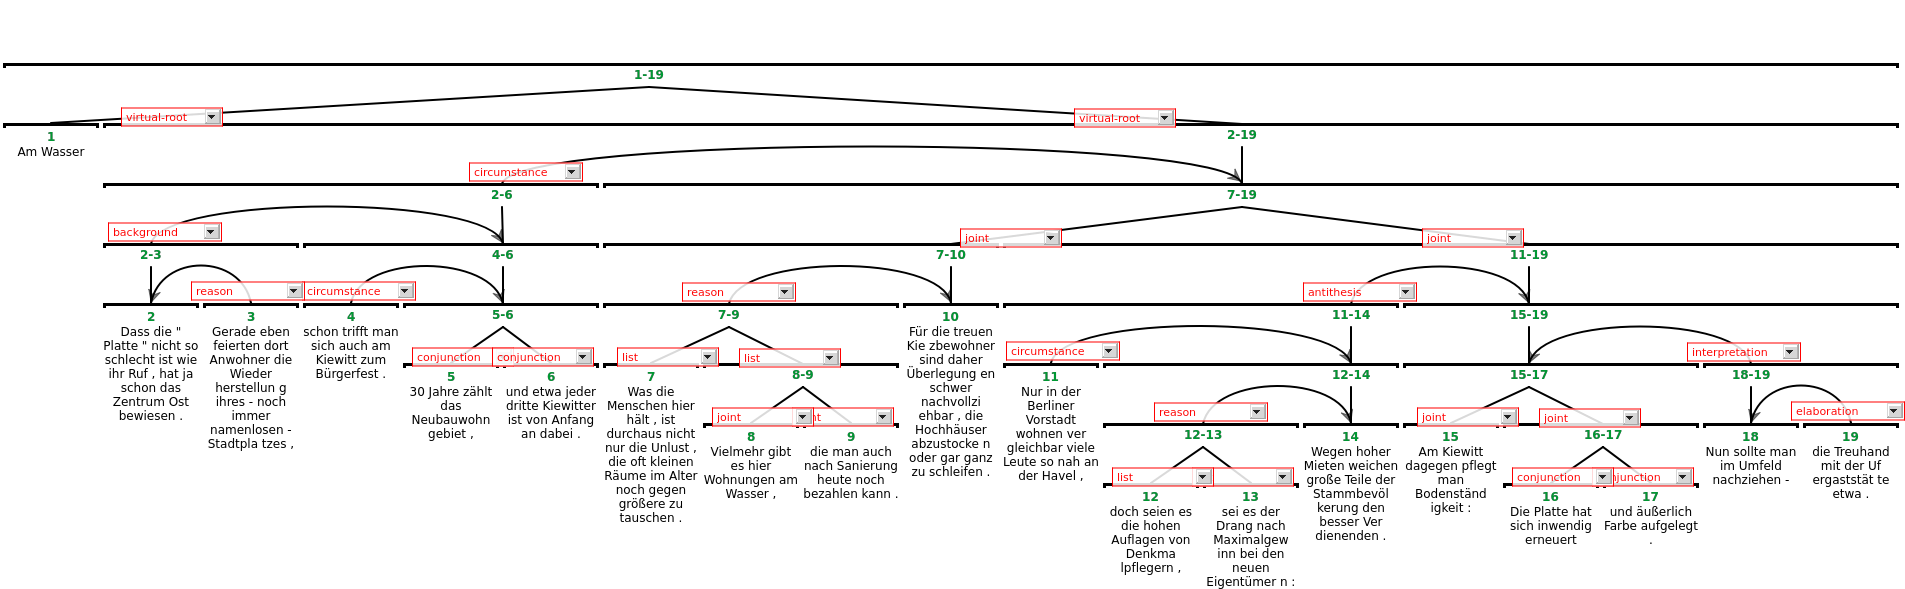

In [39]:
from rstviewer import embed_rs3_image
from IPython.display import display

for rfile in dg.corpora.pcc.get_files_by_layer('rst')[:10]:
    print os.path.basename(rfile)
    embed_rs3_image(rfile)
    dgtree = RSTTree(rfile, word_wrap=10)
    display(dgtree)
    embed_rs3_image(etree2file(RS3FileWriter(dgtree, debug=False).etree))
    

In [40]:
for rfile in dg.corpora.pcc.get_files_by_layer('rst'):  
    dgtree = RSTTree(rfile)
    RS3FileWriter(
        dgtree, output_filepath='/tmp/reconverted/{}'.format(os.path.basename(rfile)), debug=False)
